<a href="https://colab.research.google.com/github/newlightpooh/colab/blob/main/pre_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [6]:
import pandas as pd
import csv
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [3]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
# connect to google drive
import glob
from google.colab import drive
drive.mount('/content/drive')

# current path
print(os.getcwd())

# show directory
# print(os.listdir())

# show directory in each path
# data_path = 'drive/My Drive/'
# print(os.listdir(data_path))

# filelist = os.listdir(data_path)
# for filename in filelist:
#   print(filename)

Mounted at /content/drive
/content


# Split data

In [ ]:
directory_parameter = "drive/My Drive/Senior Project/parameter_collect"

for filename in os.listdir(directory_parameter) :
    file_path = os.path.join(directory_parameter, filename)
    if os.path.isfile(file_path) :
      os.remove(file_path)


In [ ]:
# %ls 'drive/My Drive/Senior Project/'

# files = glob.glob(f"drive/My Drive/Senior Project/*.log")
# for file in files:
#   df = pd.read_csv(file, delimiter=',', names=range(30))
#   df.iloc[:,1] = df.iloc[:,1] / 1000000

#   parameter_split_dict = dict()
#   parameter_split_list = list()

#   parameter_split_dict = {name: i for i, name in enumerate(df.iloc[:, 0].unique())}

#   df['group'] = df.iloc[:, 0].map(parameter_split_dict)

#   # parameter_split_list = [group for _, group in df.groupby('group', sort=False)]
#   parameter_split_list = [group.drop('group', axis=1) for _, group in df.groupby('group', sort=False)]

#   if 'XKF1' in parameter_split_dict :
#     # aduplot 4.0.8
#     print(file,"4.0.8")
#   else :
#     # aduplot 4.1.5
#     print(file,"4.1.5")




In [ ]:
filename = 'drive/My Drive/Senior Project/data/00000021.log'

df = pd.read_csv(filename, delimiter=',', names=range(30))
df.iloc[:,1] = df.iloc[:,1] / 1000000

<ipython-input-25-56d9aa80a570>:3: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, delimiter=',', names=range(30))


In [ ]:
#dict for type in pandas

data_types = {
    'a': 'int',
    'b': 'object', #int เพราะข้อมูลเหมือนเป็น id
    'B': 'object', #int เพราะข้อมูลเหมือนเป็น id
    'h': 'int',
    'H': 'int',
    'i': 'int',
    'I': 'int',
    'f': 'float',
    'd': 'float',
    'n': 'object',
    'N': 'object',
    'Z': 'object',
    'c': 'float',  #int
    'C': 'float',  #int
    'e': 'float',  #int
    'E': 'float',  #int
    'L': 'float',  #int
    'M': 'object',  #int
    'q': 'int',
    'Q': 'float'
}

In [ ]:
# split_data_into_sub_list

parameter_split_dict = dict()
parameter_split_list = list()

parameter_split_dict = {name: i for i, name in enumerate(df.iloc[:, 0].unique())}

df['group'] = df.iloc[:, 0].map(parameter_split_dict)

# parameter_split_list = [group for _, group in df.groupby('group', sort=False)]
parameter_split_list = [group.drop('group', axis=1).dropna(axis=1, how='all').applymap(lambda x: x.strip() if isinstance(x, str) else x) for _, group in df.groupby('group', sort=False)]  # drop column group ที่สร้างไว้ใช้ตอน groupby และ drop column ที่ทุก row เป็น nan

ตัดกลุ่มไม่จำเป็น


In [ ]:

# if 'XKF1' in parameter_split_dict :
#   # aduplot 4.0.8
#   parameter_from_sensor_list = ['MAG', 'MAG2', 'HEAT', 'BARO', 'BAR2', 'IMU', 'IMU2', 'IMU3', 'DSF', 'ATT', 'PIDR', 'PIDP', 'PIDY', 'PIDS', 'AOA', 'CTUN', 'NTUN', 'RCIN', 'RCOU', 'AETR', 'VIBE', 'ARSP', 'BAT', 'POWR', 'GPS', 'GPA', 'STAT', 'IOMC', 'NKF1', 'NKF2', 'NKF3', 'NKF4', 'NKF5', 'NKQ1', 'NKF6', 'NKF7', 'NKF8', 'NKF9', 'NKQ2', 'NK11', 'NK12', 'NK13', 'NK14', 'NKQ3', 'NKT1', 'NKT2', 'NKT3', 'POS', 'TERR', 'UBX1', 'UBX2', 'PM', 'AHR2', 'PIQR', 'PIQP', 'PIQY', 'PIQA', 'QTUN', 'PSC', 'CTRL', 'TECS', 'TEC2']else :
#   print("0")
#   # aduplot 4.1.5
#   parameter_from_sensor_list = ['IMU', 'AOA', 'CTUN', 'FTN', 'NTUN', 'RCIN', 'RCI2', 'RCOU', 'AETR', 'VIBE', 'ATT', 'PIDR', 'PIDP', 'PIDY', 'PIDS', 'ARSP', 'BARO', 'POWR', 'BAT', 'PIQR', 'PIQP', 'PIQY', 'PIQA', 'XKF1', 'XKF2', 'XKF3', 'XKF4', 'XKF5', 'XKFS', 'XKQ', 'XKV1', 'XKV2', 'XKT', 'DSF', 'IOMC', 'AHR2', 'GPS', 'GPA', 'UBX1', 'UBX2', 'POS', 'TERR', 'CTRL', 'QTUN', 'PSCD', 'XKY0', 'XKY1', 'TECS', 'TEC2', 'QPOS', 'PSCN', 'PSCE']

In [ ]:
# # aduplot 4.0.8
# x = ['MAG', 'MAG2', 'HEAT', 'BARO', 'BAR2', 'IMU', 'IMU2', 'IMU3', 'DSF', 'ATT', 'PIDR', 'PIDP', 'PIDY', 'PIDS', 'AOA', 'CTUN', 'NTUN', 'RCIN', 'RCOU', 'AETR', 'VIBE', 'ARSP', 'BAT', 'POWR', 'GPS', 'GPA', 'STAT', 'IOMC', 'NKF1', 'NKF2', 'NKF3', 'NKF4', 'NKF5', 'NKQ1', 'NKF6', 'NKF7', 'NKF8', 'NKF9', 'NKQ2', 'NK11', 'NK12', 'NK13', 'NK14', 'NKQ3', 'NKT1', 'NKT2', 'NKT3', 'POS', 'TERR', 'UBX1', 'UBX2', 'PM', 'AHR2', 'PIQR', 'PIQP', 'PIQY', 'PIQA', 'QTUN', 'PSC', 'CTRL', 'TECS', 'TEC2']
# # aduplot 4.1.5
# y = ['IMU', 'AOA', 'CTUN', 'FTN', 'NTUN', 'RCIN', 'RCI2', 'RCOU', 'AETR', 'VIBE', 'ATT', 'PIDR', 'PIDP', 'PIDY', 'PIDS', 'ARSP', 'BARO', 'POWR', 'BAT', 'PIQR', 'PIQP', 'PIQY', 'PIQA', 'XKF1', 'XKF2', 'XKF3', 'XKF4', 'XKF5', 'XKFS', 'XKQ', 'XKV1', 'XKV2', 'XKT', 'DSF', 'IOMC', 'AHR2', 'GPS', 'GPA', 'UBX1', 'UBX2', 'POS', 'TERR', 'CTRL', 'QTUN', 'PSCD', 'XKY0', 'XKY1', 'TECS', 'TEC2', 'QPOS', 'PSCN', 'PSCE']

# c = {element for element in y if element not in x}  #y-x
# print(c)

{'QPOS', 'XKQ', 'RCI2', 'XKY1', 'XKF3', 'XKF1', 'PSCE', 'XKV1', 'XKF5', 'FTN', 'PSCD', 'XKF4', 'XKFS', 'XKV2', 'XKY0', 'PSCN', 'XKF2', 'XKT'}


In [ ]:
# test = {element for element in parameter_split_dict if element in no_need_parameter_list}
# print(test)


In [ ]:
# collect_parameter
# parameter collect from sensor

# no_need_parameter_list = ['ARM', 'CAM', 'CMD', 'FMT', 'FMTU', 'LAND', 'MAV', 'MAVC', 'MODE', 'MSG', 'MULT', 'ORGN', 'PARM', 'RAD', 'RATE', 'STRT', 'TSYN', 'UNIT', 'STAT', 'MAG', 'MAG2', 'HEAT', 'AUXF', 'EV', 'PM', 'STRT']
# parameter_from_sensor_list = list()

# for i in parameter_split_dict :
#   if i in no_need_parameter_list :
#     continue
#   parameter_from_sensor_list.append(i)

# print(parameter_from_sensor_list)
# print(len(parameter_from_sensor_list))

# parameter_from_sensor_dict = {param: idx for idx, param in enumerate(parameter_from_sensor_list)}

In [ ]:
# #check parameter unused
# unused_parameter_list = []

# for index, row in parameter_split_list[0].iterrows():
#     if 'B' in row[4] or 'Z' in row[4]:
#         unused_parameter_list.append(row[3].strip())

# print(unused_parameter_list)

# print(len(unused_parameter_list))


['FMT', 'UNIT', 'FMTU', 'GPS', 'GPA', 'UBX1', 'UBX2', 'GRAW', 'GRXH', 'GRXS', 'MSG', 'BARO', 'PL', 'POWR', 'CMD', 'MAVC', 'RAD', 'ARSP', 'BAT', 'BCL', 'MAG', 'MODE', 'RFND', 'DMS', 'BCN', 'PRX', 'PRXR', 'SRTL', 'OABR', 'OADJ', 'SA', 'TERR', 'ESC', 'CSRV', 'PIDR', 'PIDP', 'PIDY', 'PIDA', 'PIDS', 'PIDN', 'PIDE', 'DSTL', 'ACC', 'GYR', 'IMU', 'VIBE', 'ISBH', 'RFRF', 'RFRN', 'REV2', 'REV3', 'REY3', 'RISH', 'RISI', 'RASH', 'RASI', 'RBRH', 'RBRI', 'RRNH', 'RRNI', 'RGPH', 'RGPI', 'RGPJ', 'RMGH', 'RMGI', 'RBCH', 'RBCI', 'RVOH', 'ROFH', 'NKF0', 'NKF1', 'NKF2', 'NKF3', 'NKF4', 'NKF5', 'NKQ', 'NKT', 'XKF0', 'XKF1', 'XKF2', 'XKF3', 'XKF4', 'XKF5', 'XKFD', 'XKFM', 'XKFS', 'XKQ', 'XKT', 'XKTV', 'XKV1', 'XKV2', 'XKY0', 'XKY1', 'NKY0', 'NKY1', 'ATT', 'ORGN', 'RALY', 'MAV', 'VISP', 'VISV', 'OF', 'EV', 'ARM', 'ERR', 'WINC', 'SBRE', 'STRT', 'ATRP', 'STAT', 'QTUN', 'PIQR', 'PIQP', 'PIQY', 'PIQA', 'PIDG', 'OFG', 'CMDI', 'CMDS', 'CMDA', 'CMDH', 'FTN', 'TSYN', 'AUXF', 'LAND', 'TECS', 'QPOS']
127


In [ ]:
# parameter_from_sensor_list = list()

# for i in parameter_split_dict :
#   if i in unused_parameter_list :
#     continue
#   parameter_from_sensor_list.append(i)

# print(parameter_from_sensor_list)
# print(len(parameter_from_sensor_list))

['PARM', 'AOA', 'CTUN', 'NTUN', 'RCIN', 'RCOU', 'AETR', 'MULT', 'IOMC', 'HEAT', 'DSF', 'PM', 'POS', 'AHR2', 'RCI2', 'RATE', 'CTRL', 'PSCD', 'PSCN', 'PSCE', 'TEC2', 'CAM']
22


In [ ]:
# no_need_parameter_list = ['ARM', 'CAM', 'CMD', 'FMT', 'FMTU', 'LAND', 'MAV', 'MAVC', 'MODE', 'MSG', 'MULT', 'ORGN', 'PARM', 'RAD', 'RATE', 'STRT', 'TSYN', 'UNIT', 'STAT', 'MAG', 'MAG2', 'HEAT', 'AUXF', 'EV', 'PM', 'STRT']
# len(no_need_parameter_list)

26

In [ ]:
# create FMT.csv
fmt_parameter_dict = dict()

parameter_split_list[0].to_csv('drive/My Drive/Senior Project/parameter_collect/{}.csv'.format(parameter_split_list[0].iloc[0, 0]), index=False, header=False)

# get parameter with sub parameter
parameter_fmt = open('drive/My Drive/Senior Project/parameter_collect/FMT.csv')
fmt_reader = csv.reader(parameter_fmt)

fmt_rows = list()

for row in fmt_reader :
    del row[0:3]
    del row[1]
    row = [value.strip() for value in row if value != '']
    fmt_rows.append(row)

for i in range(len(fmt_rows)) :
    for j in range(2, len(fmt_rows[i])) :
        fmt_rows[i][j] = fmt_rows[i][0] + '_' + fmt_rows[i][j]

# create dict to collect parameter with sub parameter
for i in range(len(fmt_rows)) :
    if len(fmt_rows[i]) > 0:
        fmt_parameter_dict[fmt_rows[i][0]] = fmt_rows[i]

In [ ]:
# create FMT data type
fmt_data_type_dict = dict()

parameter_fmt = open('drive/My Drive/Senior Project/parameter_collect/FMT.csv')
fmt_reader = csv.reader(parameter_fmt)

fmt_rows = list()

for row in fmt_reader :
    row_type = list()
    row_type.append(row[3].strip())
    row_type.extend([value for value in row[4].strip()])
    fmt_rows.append(row_type)

for i in range(len(fmt_rows)) :
    #ไว้สำหรับชื่อ row group parameter
    modified_row = fmt_rows[i].copy()
    modified_row[0] = "Z"
    modified_row = [data_types.get(item, item) for item in modified_row]
    fmt_data_type_dict[fmt_rows[i][0]] = modified_row

In [ ]:
print(fmt_parameter_dict['MAG'])

['MAG', 'TimeUS', 'MAG_I', 'MAG_MagX', 'MAG_MagY', 'MAG_MagZ', 'MAG_OfsX', 'MAG_OfsY', 'MAG_OfsZ', 'MAG_MOX', 'MAG_MOY', 'MAG_MOZ', 'MAG_Health', 'MAG_S']


In [ ]:
# create_parameter_csv
# create new CSV with library CSV

for i in range(1,len(parameter_split_list)):
    filename = 'drive/My Drive/Senior Project/parameter_collect/{}.csv'.format(parameter_split_list[i].iloc[0, 0])

    header_list = fmt_parameter_dict[parameter_split_list[i].iloc[0, 0]]

    df_with_header = pd.DataFrame(parameter_split_list[i].values, columns=header_list) #drop column ที่มี nan

    df_with_header.to_csv(filename, index=False)

In [ ]:
#ให้ type ใน df ตาม fmt_data_type_dict
#ให้ header ตาม fmt_parameter_dict

for df in parameter_split_list[1:]:
  # print(df.iloc[0, 0])
  df.columns = fmt_parameter_dict[df.iloc[0, 0]]
  data_type = fmt_data_type_dict[df.iloc[0, 0]]
  for col, dtype in zip(df.columns, data_type):
    df[col] = df[col].astype(dtype)


In [ ]:
parameter_split_list[parameter_split_dict['MODE']]

,MODE,TimeUS,MODE_Mode,MODE_ModeNum,MODE_Rsn
1747,MODE,6.619127,Manual,0,26
1773,MODE,6.638838,CIRCLE,1,3
10228,MODE,11.791980,RTL,11,3
10229,MODE,11.791986,RTL,11,3
1192581,MODE,690.054546,RTL,11.0,3.0
1683009,MODE,971.006787,RTL,11.0,3.0
1776532,MODE,1024.577228,QHOVER,18,1
1852265,MODE,1063.773739,Auto,10,2
3098606,MODE,1704.349938,FBWA,5.0,1.0
3099261,MODE,1704.630095,QHOVER,18.0,1.0


In [ ]:
parameter_split_list[8].dtypes

RCIN         object
TimeUS      float64
RCIN_C1       int64
RCIN_C2       int64
RCIN_C3       int64
RCIN_C4       int64
RCIN_C5       int64
RCIN_C6       int64
RCIN_C7       int64
RCIN_C8       int64
RCIN_C9       int64
RCIN_C10      int64
RCIN_C11      int64
RCIN_C12      int64
RCIN_C13      int64
RCIN_C14      int64
dtype: object

# Plot Data

In [ ]:
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'key_col1': ['X', 'Y', 'Z']})
df2 = pd.DataFrame({'C': [7, 8, 9], 'D': [10, 11, 12], 'key_col2': ['X', 'Y', 'Z']})
concatenated_df = pd.concat([df1, df2], axis=0)
concatenated_df

,A,B,key_col1,C,D,key_col2
0,1.0,4.0,X,NaN,NaN,NaN
1,2.0,5.0,Y,NaN,NaN,NaN
2,3.0,6.0,Z,NaN,NaN,NaN
0,NaN,NaN,NaN,7.0,10.0,X
1,NaN,NaN,NaN,8.0,11.0,Y
2,NaN,NaN,NaN,9.0,12.0,Z


In [ ]:
parameter_data_list[parameter_from_sensor_dict['XKY0[0]']]


NameError: ignored

In [ ]:
plot_df['TECS_dh'].min()

-4.464608

In [ ]:
plot_df.loc[plot_df['TECS_dh'].idxmin()]['TimeUS']/60

28.367163766666668

In [ ]:
plot_df.loc[plot_df['TECS_dh'].idxmin()]

TimeUS          1702.029826
IMU_GyrX           0.100291
IMU_GyrY           0.134186
IMU_GyrZ           0.056343
IMU_AccX          -0.308585
                   ...     
CAM_Roll           0.894615
CAM_Pitch         -6.813077
CAM_Yaw          317.790000
BAT_VoltCurr     529.640735
BAT_EnrgDiff       0.015380
Name: 5881, Length: 560, dtype: float64

In [ ]:
filename = 'drive/My Drive/Senior Project/Complete_combine/2/00000021.csv'

plot_df = pd.read_csv(filename)
plot_df

# df= parameter_data_list[parameter_from_sensor_dict['XKY0[0]']]

,TimeUS,IMU_GyrX,IMU_GyrY,IMU_GyrZ,IMU_AccX,IMU_AccY,IMU_AccZ,IMU_EG,IMU_EA,IMU_T,...,CAM_Lat,CAM_Lng,CAM_Alt,CAM_RelAlt,CAM_GPSAlt,CAM_Roll,CAM_Pitch,CAM_Yaw,BAT_VoltCurr,BAT_EnrgDiff
0,1073.687888,-0.006203,-0.004848,-0.000352,-0.063598,0.120038,-9.764191,0,0,50.10283,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,0.0,0.0
1,1073.834788,-0.007789,-0.003879,-0.000568,-0.062264,0.120708,-9.755151,0,0,50.10411,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,0.0,0.0
2,1074.056905,-0.006129,-0.004756,-0.000175,-0.068171,0.130145,-9.773041,0,0,50.10514,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,0.0,0.0
3,1074.167417,-0.006894,-0.003582,-0.000394,-0.068870,0.123896,-9.766603,0,0,50.10327,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,0.0,0.0
4,1074.269055,-0.006666,-0.004352,-0.001220,-0.085857,0.124845,-9.784279,0,0,50.10213,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16026,2771.864994,-0.003211,-0.002506,0.000895,0.042890,0.059495,-9.822264,0,0,44.99931,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.0,0.0
16027,2771.964961,-0.003209,-0.002216,0.001373,0.035743,0.062063,-9.827259,0,0,44.99974,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.0,0.0
16028,2772.064960,-0.003858,-0.001997,0.000800,0.040750,0.063920,-9.819744,0,0,45.00195,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.0,0.0
16029,2772.165500,-0.003561,-0.002923,0.000740,0.036988,0.071305,-9.827322,0,0,45.00259,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.0,0.0


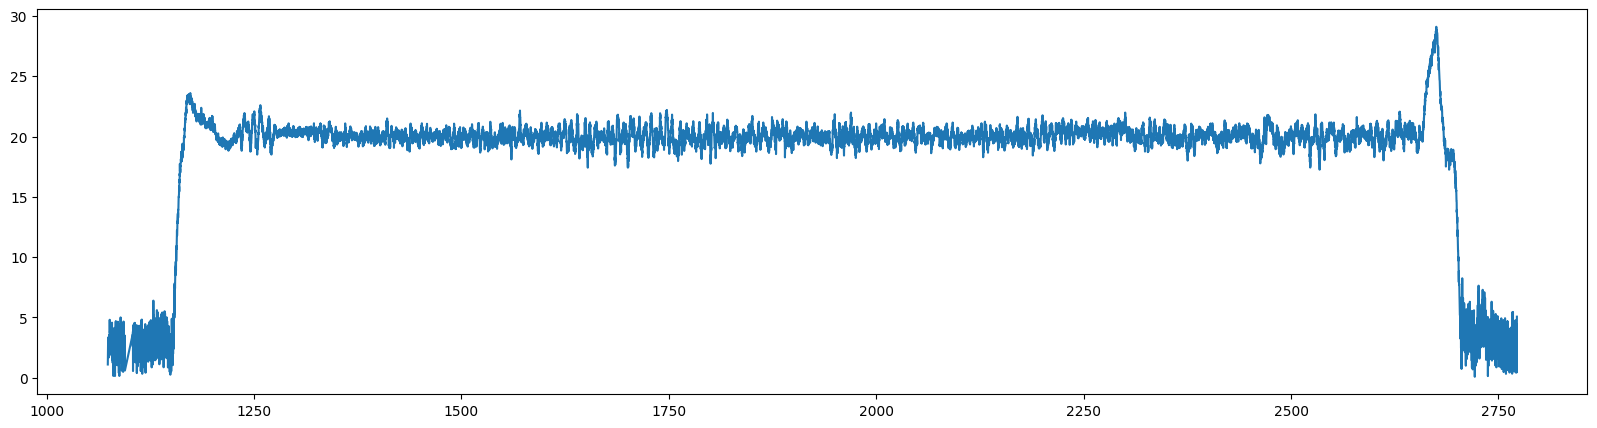

In [ ]:
x=plot_df['TimeUS']
y=plot_df['ARSP_Airspeed']

# for i in range(1, len(imu_rows)) :
#   x.append(float(imu_rows[i][1]))
#   y.append(float(imu_rows[i][4]))

plt.figure(figsize=(20, 5))
plt.plot(x, y)
# plt.title("Gps ( line )")
plt.show()

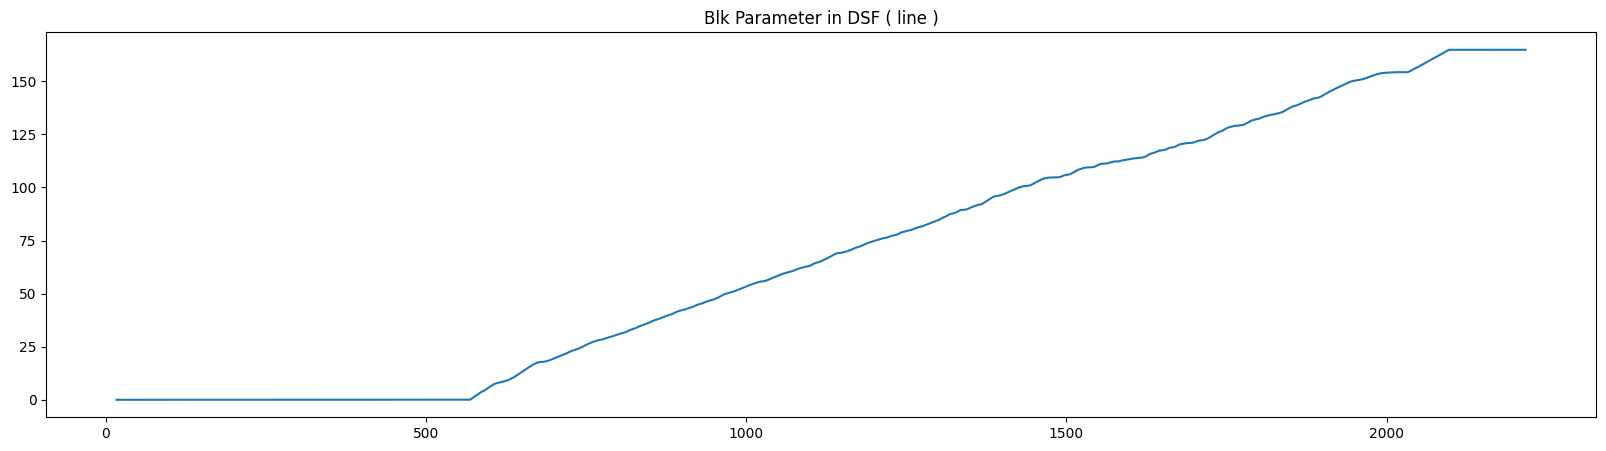

In [ ]:
# try to plot data

x = []
y = []

parameter_dsf = open('drive/My Drive/Senior Project/parameter_collect/BAT.csv')

dsf_reader = csv.reader(parameter_dsf)
count_BAT = 0

dsf_rows = []

headings = next(dsf_reader)

# output list to store all rows
Output = []
for row in dsf_reader:
    Output.append(row[:])

for row in Output :
  # if count_BAT == 100 :
  #   break
  dsf_rows.append(row)
  x.append(float(row[1]))
  y.append(float(row[6]))

# for i in range(1000) :
#   print(x[i], y[i])

# # scatter plot
# plt.figure(figsize=(5, 5))
# plt.scatter(x, y, marker = 'X', linewidths = 1)
# plt.title("Blk Parameter in DSF ( scatter )")
# plt.show()

# line plot
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.title("Blk Parameter in DSF ( line )")
plt.show()

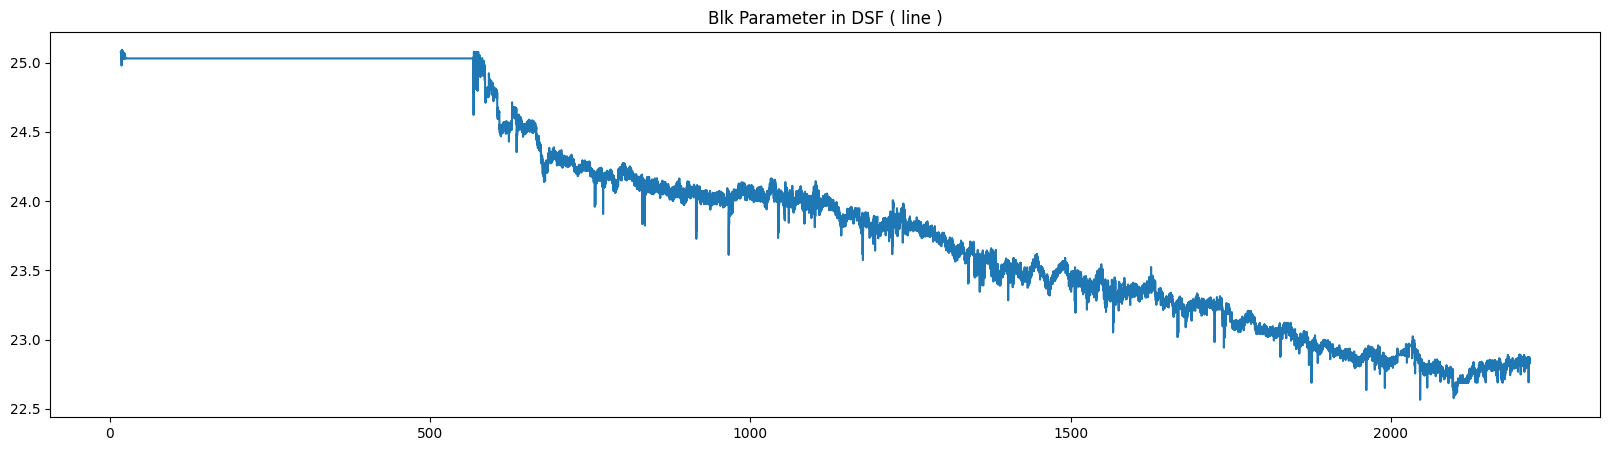

In [ ]:
# try to plot data

x = []
y = []

parameter_dsf = open('drive/My Drive/Senior Project/parameter_collect/BAT.csv')

dsf_reader = csv.reader(parameter_dsf)
count_BAT = 0

dsf_rows = []

headings = next(dsf_reader)

# output list to store all rows
Output = []
for row in dsf_reader:
    Output.append(row[:])

for row in Output :
  # if count_BAT == 100 :
  #   break
  dsf_rows.append(row)
  x.append(float(row[1]))
  y.append(float(row[3]))

# for i in range(1000) :
#   print(x[i], y[i])

# # scatter plot
# plt.figure(figsize=(5, 5))
# plt.scatter(x, y, marker = 'X', linewidths = 1)
# plt.title("Blk Parameter in DSF ( scatter )")
# plt.show()

# line plot
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.title("Blk Parameter in DSF ( line )")
plt.show()

# Convert All Data to 10 Hz

In [ ]:
len(parameter_split_list)

76

In [ ]:
len(parameter_data_list)

NameError: ignored

In [ ]:
x= parameter_split_list[parameter_split_dict['VIBE']]
# num_groups = x[x.columns[2]].nunique()
# num_groups
# unique_values = x[x.columns[2]].unique()
# unique_values
y = x.columns[2].split('_')[1] in ['chan', 'IMU']
y,x.columns[2]

(True, 'VIBE_IMU')

In [ ]:
##draft1 กรองก่อน แล้วค่อยแตก df
# parameter_from_sensor_list = []
# parameter_data_list = []
# header_list = []


# for df in parameter_split_list:
#     df_after = df.iloc[:, 2:]
#     df_before = df.iloc[:, :2]
#     df_after = df_after.select_dtypes(exclude='object')

#     if len(df_after.columns) > 0:
#       df_result = pd.concat([df_before, df_after], axis=1)
#       if ((len(df_result.columns[2].split('_')[1]) == 1) or (df_result.columns[2].split('_')[1] == 'chan')) and df_result.dtypes[2] == int :
#         grouped_df = df_result.groupby(df_result.columns[2])
#         name = df_result.columns[0]
#         for group_name, group_data in grouped_df:
#           column_name_mapping = {col: col.replace(name, name+"["+str(group_name)+"]") for col in group_data.columns if name in col}
#           group_data.rename(columns=column_name_mapping, inplace=True)
#           parameter_from_sensor_list.append(group_data.columns[0])
#           header_list.append(group_data.columns.tolist())
#           parameter_data_list.append(group_data)
#           # print(group_data.columns[0])
#       else:
#         parameter_from_sensor_list.append(df_result.iloc[0,0])
#         header_list.append(df_result.columns.tolist())
#         parameter_data_list.append(df_result)

# parameter_from_sensor_dict = {param: idx for idx, param in enumerate(parameter_from_sensor_list)}

In [ ]:
parameter_from_sensor_list = []
parameter_data_list = []
header_list = []
non_filter_parameter_split_list = []

# for df in parameter_split_list:
for i in range(len(parameter_split_list)):
  df = parameter_split_list[i]
  # if type(df.columns[2]) != int: #ไม่เอาFMT
  if i != parameter_split_dict['FMT'] :
    if (((len(df.columns[2].split('_')[1]) == 1) or (df.columns[2].split('_')[1] in ['chan', 'IMU'])) and df.dtypes[2] == object):
      temp_df = df.copy()
      # temp_df.iloc[:, 2] = temp_df.iloc[:, 2].astype(int)
      temp_df[temp_df.columns[2]] = temp_df[temp_df.columns[2]].astype(int)
      grouped_df = temp_df.groupby(temp_df.columns[2])
      name = temp_df.columns[0]
      num_groups = temp_df[temp_df.columns[2]].nunique()
      if num_groups>1:
        for group_name, group_data in grouped_df:
          column_name_mapping = {col: col.replace(name, name+"["+str(group_name)+"]") for col in group_data.columns if name in col}
          group_data.rename(columns=column_name_mapping, inplace=True)
          # print(name+"_"+str(group_name))
          group_data.iloc[:, 2] = group_data.iloc[:, 2].astype(object)
          non_filter_parameter_split_list.append(group_data)
        # print(name)
      else:
        non_filter_parameter_split_list.append(df)
    else:
      non_filter_parameter_split_list.append(df)


for df in non_filter_parameter_split_list:
    df_before = df.iloc[:, :2]
    df_after = df.iloc[:, 2:]
    df_after = df_after.select_dtypes(exclude='object')

    if len(df_after.columns) > 0:
      df_result = pd.concat([df_before, df_after], axis=1)
      parameter_from_sensor_list.append(df_result.columns[0])
      header_list.append(df_result.columns.tolist())
      parameter_data_list.append(df_result)

parameter_from_sensor_dict = {param: idx for idx, param in enumerate(parameter_from_sensor_list)}

In [ ]:
parameter_from_sensor_dict

In [ ]:
len(parameter_from_sensor_dict)

83

In [ ]:
parameter_split_list[parameter_split_dict['VIBE']]

,VIBE,TimeUS,VIBE_IMU,VIBE_VibeX,VIBE_VibeY,VIBE_VibeZ,VIBE_Clip
216,VIBE,6.482194,0,0.140046,0.177363,0.083431,0
217,VIBE,6.482194,1,0.158614,0.202655,0.107674,0
218,VIBE,6.482194,2,0.077757,0.109467,0.096392,0
860,VIBE,6.526269,0,0.119040,0.145692,0.081441,0
861,VIBE,6.526269,1,0.133572,0.169382,0.103839,0
...,...,...,...,...,...,...,...
3195967,VIBE,1751.648342,1,0.073849,0.102138,0.118191,0
3195968,VIBE,1751.648342,2,0.043987,0.048810,0.094560,0
3196045,VIBE,1751.688112,0,0.065952,0.083196,0.115457,0
3196046,VIBE,1751.688112,1,0.076697,0.099049,0.125973,0


In [ ]:
parameter_data_list[parameter_from_sensor_dict['VIBE[0]']]


,VIBE[0],TimeUS,VIBE[0]_VibeX,VIBE[0]_VibeY,VIBE[0]_VibeZ,VIBE[0]_Clip
216,VIBE,6.482194,0.140046,0.177363,0.083431,0
860,VIBE,6.526269,0.119040,0.145692,0.081441,0
1559,VIBE,6.579046,0.099818,0.114408,0.082622,0
1739,VIBE,6.619071,0.092892,0.100521,0.079892,0
1807,VIBE,6.659196,0.081805,0.088647,0.079925,0
...,...,...,...,...,...,...
3195743,VIBE,1751.528116,0.084058,0.100837,0.124907,0
3195814,VIBE,1751.568389,0.073223,0.091419,0.117048,0
3195894,VIBE,1751.608446,0.066399,0.104492,0.109258,0
3195966,VIBE,1751.648342,0.056235,0.085911,0.101629,0


In [ ]:
len(header_list)

83

In [ ]:
# #กรณี parameter_from_sensor_list เลือกแบบกลุ่มมา
# parameter_data_list = []
# header_list = []

# for i in range(len(parameter_from_sensor_list)) :
#     header_list.append(fmt_parameter_dict[parameter_from_sensor_list[i]])
#     parameter_data_list.append(parameter_split_list[parameter_split_dict[parameter_from_sensor_list[i]]])

In [ ]:
# combine all header

all_subheader_list=[]
all_subheader_list.append('TimeUS')

for i in range(len(header_list)) :
    for j in range(2, len(header_list[i])) :
        all_subheader_list.append(header_list[i][j])

In [ ]:
all_subheader_list

In [ ]:
# get_battery_time
# separate_parameter_frequency
# separate parameter with fraquency more than 10 Hz and less than 10 Hz

energy_consumption_time = list()
equal_or_more_than_10_hz_parameter = list()
less_than_10_hz_parameter = list()

energy_consumption_time = parameter_data_list[parameter_from_sensor_dict['BAT']].iloc[:,1].astype(float)

time_diff_energy = energy_consumption_time.shift(-1) - energy_consumption_time
avg_time_diff_energy = time_diff_energy.dropna().mean()
# print(avg_time_diff_energy)

for i in range(len(parameter_data_list)) :
    # if float(parameter_data_list[i][2][1]) - float(parameter_data_list[i][1][1]) > time_diff + 0.02 and float(parameter_data_list[i][2][1]) - float(parameter_data_list[i][1][1]) > time_diff - 0.02 :
    time_parameter = parameter_data_list[i].iloc[:,1].astype(float)
    time_diff_parameter = time_parameter.shift(-1) - time_parameter
    avg_time_diff_parameter = time_diff_parameter.dropna().mean()
    # print(avg_time_diff_parameter,parameter_data_list[i].iloc[0,0])
    if  avg_time_diff_parameter > avg_time_diff_energy  :
        # less_than_10_hz_parameter.append(parameter_data_list[i].iloc[0,0])
        less_than_10_hz_parameter.append(parameter_data_list[i].columns[0])
    else :
        # equal_or_more_than_10_hz_parameter.append(parameter_data_list[i].iloc[0,0])
        equal_or_more_than_10_hz_parameter.append(parameter_data_list[i].columns[0])

In [ ]:
len(equal_or_more_than_10_hz_parameter)

49

In [ ]:
len(less_than_10_hz_parameter)

34

In [ ]:
# find order in each parameter
less_than_10_hz_order = []
equal_or_more_than_10_hz_order = []
lt_count = 0
eom_count = 0

for i in range(len(parameter_data_list)) :
    if lt_count < len(less_than_10_hz_parameter) and parameter_data_list[i].columns[0] == less_than_10_hz_parameter[lt_count] :
        less_than_10_hz_order.append(i)
        lt_count += 1
    elif eom_count < len(equal_or_more_than_10_hz_parameter)  and parameter_data_list[i].columns[0] == equal_or_more_than_10_hz_parameter[eom_count]:
        equal_or_more_than_10_hz_order.append(i)
        eom_count += 1

for parameter in equal_or_more_than_10_hz



```
# select data that in same time of energy consumption
parameter_same_freq_list = list()

for k in equal_or_more_than_10_hz_order :
    new_parameter = list()
    time_count = 1

    for i in range(len(energy_consumption_time)) :
        parameter_dataset = list()
        parameter_dataset.append(energy_consumption_time.iloc[i])

        if energy_consumption_time.iloc[i] > float(parameter_data_list[k].iloc[-1, 1]) : #ถ้าเวลาข้อมูลล่าสุดน้อยกว่าเวลาของ energy
            for j in range(2, len(parameter_data_list[k].iloc[0] )) :  #สร้างข้อมูลใหมตั้งแต่เวลาล่าสุดของ paremeter จน.row = จน.row energy
                gen_new_data = 0
                parameter_dataset.append(gen_new_data)      

        else :
            for l in range(time_count, len(parameter_data_list[k])) :
                if time_count + 1 >= len(parameter_data_list[k]) :
                    time_count = len(parameter_data_list[k]) - 1
                    for j in range(2, len(parameter_data_list[k].iloc[0])) :
                        gen_new_data = parameter_data_list[k].iloc[time_count,j]
                        parameter_dataset.append(gen_new_data)
                    break

                elif abs(energy_consumption_time.iloc[i] - float(parameter_data_list[k].iloc[time_count,1])) < abs(energy_consumption_time.iloc[i] - float(parameter_data_list[k].iloc[time_count + 1,1])) :
                    for j in range(2, len(parameter_data_list[k].iloc[0])) :
                        # print(parameter_data_list[k],parameter_data_list[k].index)
                        # print(time_count)
                        gen_new_data = parameter_data_list[k].iloc[time_count,j]
                        parameter_dataset.append(gen_new_data)
                    break           

                time_count = l

            if parameter_dataset == [] :
                print(1)
        new_parameter.append(parameter_dataset[1:]) #ไม่เอา time มา

    parameter_same_freq_list.append(new_parameter)```



In [ ]:
# for k in equal_or_more_than_10_hz_order :
#     new_parameter = list()
#     time_count = 1

#     for i in range(len(energy_consumption_time)) :
#         parameter_dataset = list()
#         parameter_dataset.append(energy_consumption_time.iloc[i])

#         if energy_consumption_time.iloc[i] > float(parameter_data_list[k].iloc[-1, 1]) : #ถ้าเวลาข้อมูลล่าสุดน้อยกว่าเวลาของ energy
#             print(i,energy_consumption_time.iloc[i],parameter_data_list[k].iloc[0, 0])

In [ ]:
##draft1
# parameter_same_freq_list = list()

# for k in equal_or_more_than_10_hz_order:
#     df_energy_consumption_time_with_header = pd.DataFrame(energy_consumption_time.values, columns=['TimeUS'])

#     df_with_header = pd.DataFrame(parameter_data_list[k])
#     header_list = df_with_header.columns

#     merged_data = pd.merge_asof(df_energy_consumption_time_with_header, df_with_header, on='TimeUS', direction='nearest')

#     result = merged_data.filter(items=header_list)
#     result = result.drop(columns=result.columns[[0, 1]])

#     parameter_same_freq_list.append(result)

In [ ]:
parameter_same_freq_list = list()

for k in equal_or_more_than_10_hz_order:
    df_low_freq = pd.DataFrame(energy_consumption_time.values, columns=['TimeUS'])

    df_high_freq = parameter_data_list[k]

    merged_df = pd.merge_asof(df_low_freq, df_high_freq, on='TimeUS', direction='nearest')

    merged_df.drop(merged_df.columns[[0, 1]],axis = 1 ,inplace = True)

    parameter_same_freq_list.append(merged_df)

In [ ]:
len(parameter_same_freq_list)

47

In [ ]:
# parameter_same_freq_list = list()

# for k in equal_or_more_than_10_hz_order:
#     df_energy_consumption_time_with_header = pd.DataFrame(energy_consumption_time.values, columns=['TimeUS'])
#     df_energy_consumption_time_with_header['TimeUS'] = pd.to_numeric(df_energy_consumption_time_with_header['TimeUS'], errors='coerce')

#     header_list = fmt_parameter_dict[parameter_data_list[k].iloc[0,0]]
#     df_with_header = pd.DataFrame(parameter_data_list[k].values, columns=header_list)
#     df_with_header['TimeUS'] = df_with_header['TimeUS'].apply(pd.to_numeric, errors='coerce')


#     merged_data = pd.merge_asof(df_energy_consumption_time_with_header, df_with_header, on='TimeUS', direction='nearest')

#     result = merged_data.filter(items=header_list)
#     result = result.drop(columns=result.columns[[0, 1]])

#     parameter_same_freq_list.append(result)

In [ ]:
parameter_same_freq_list[0].dtypes

IMU[0]_GyrX    float64
IMU[0]_GyrY    float64
IMU[0]_GyrZ    float64
IMU[0]_AccX    float64
IMU[0]_AccY    float64
IMU[0]_AccZ    float64
IMU[0]_EG        int64
IMU[0]_EA        int64
IMU[0]_T       float64
IMU[0]_GHz       int64
IMU[0]_AHz       int64
dtype: object

for parameter less_than_10_hz



```
# create m in linier equation
# from y = mx + c
# m = delta y / delta x
# solving c

# m and c for each parameter from sensor
m_list = []
c_list = []

for k in less_than_10_hz_order :
  # create list to collect all m and c for sub parameter
  sub_m_list = []
  sub_c_list = []

  # loop in each parameter from sensor
  for i in range(1, len(parameter_data_list[k]) - 1) :

    # append list to collect m and c in each timestamp
    sub_m_list.append([])
    sub_c_list.append([])

    for j in range(2, len(parameter_data_list[k].iloc[i])) :

      m = abs(float(parameter_data_list[k].iloc[i + 1,j]) - float(parameter_data_list[k].iloc[i,j])) / (float(parameter_data_list[k].iloc[i + 1,1]) - float(parameter_data_list[k].iloc[i,1]))
      sub_m_list[i - 1].append(m)
      c = float(parameter_data_list[k].iloc[i + 1,j]) - (m * float(parameter_data_list[k].iloc[i + 1,1]))
      sub_c_list[i - 1].append(c)

  m_list.append(sub_m_list)
  c_list.append(sub_c_list)

print(len(m_list[1]))

# generate data to small frequency (BAT)

new_parater_list = []
mc_list_count = 0

for k in less_than_10_hz_order :
  # print(mc_list_count)
  new_parameter = []
  m_condition = 0
  c_condition = 0
  time_count = 1

  # in BAT parameter time
  for i in range(len(energy_consumption_time)) :
    # print(1)
    parameter_dataset = []
    parameter_dataset.append(energy_consumption_time.iloc[i])

    # condition if time more than value in parameter that sensor has correct
    if time_count >= len(parameter_data_list[k]) :
      time_count = len(parameter_data_list[k]) - 1
      # print('BAT time {} and Parameter time {} in condition 1'.format(energy_consumption_time.iloc[i], parameter_data_list[k].iloc[time_count,1]))

      for j in range(len(m_list[mc_list_count][0])) :
        gen_new_data = parameter_data_list[k].iloc[time_count,j + 2]
        parameter_dataset.append(gen_new_data)

    # condition if already have data from sensor , then add it in new list
    elif(float(parameter_data_list[k].iloc[time_count,1]) < float(energy_consumption_time.iloc[i])) :
      # print('BAT time {} and Parameter time {} in condition 2'.format(imu_time[i], parameter_data_list[k][time_count][1]))
      for j in range(len(m_list[mc_list_count][0])) :
        gen_new_data = parameter_data_list[k].iloc[time_count,j + 2]
        parameter_dataset.append(gen_new_data)

      time_count += 1
      m_condition += 1
      c_condition += 1
      if m_condition >= len(m_list[mc_list_count][0]) or c_condition >= len(c_list[mc_list_count][0]) :
        m_condition = len(m_list[mc_list_count][0]) - 1
        c_condition = len(c_list[mc_list_count][0]) - 1

    else :
      # print('BAT time {} and Parameter time {} in condition 3'.format(imu_time[i], parameter_data_list[k][time_count][1]))
      # print(m_condition)
      for j in range(len(m_list[mc_list_count][0])) :
        # gen_new_data = m_list[mc_list_count][m_condition][j]
        gen_new_data = (m_list[mc_list_count][m_condition][j] * float(energy_consumption_time.iloc[i])) + c_list[mc_list_count][c_condition][j]

        parameter_dataset.append(gen_new_data)

    new_parameter.append(parameter_dataset[1:])

  mc_list_count += 1
  new_parater_list.append(new_parameter)

# print(new_parater_list[0][0:10])

```



In [ ]:
# #draft1
# t_parameter_same_freq_list = list()

# for k in less_than_10_hz_order :
#   df_high_freq = pd.DataFrame(energy_consumption_time.values, columns=['TimeUS'])

#   header_list = fmt_parameter_dict[parameter_data_list[k].iloc[0,0]]
#   df_low_freq = pd.DataFrame(parameter_data_list[k].values, columns=header_list)
#   df_low_freq.iloc[:, 1:] = df_low_freq.iloc[:, 1:].astype(float)

#   for i in range(len(df_low_freq)):
#       idx_closest = (df_high_freq['TimeUS'] - df_low_freq['TimeUS'].iloc[i]).abs().idxmin()
#       df_high_freq.loc[idx_closest, df_low_freq.columns[2:]] = df_low_freq.iloc[i, 2:]

#   t_parameter_same_freq_list.append(df_high_freq)



In [ ]:
# #draft2
# t2_parameter_same_freq_list = list()

# for k in less_than_10_hz_order :
#   df_high_freq = pd.DataFrame(energy_consumption_time.values, columns=['TimeUS'])

#   df_low_freq = pd.DataFrame(parameter_data_list[k])
#   header_list = fmt_parameter_dict[parameter_data_list[k].iloc[0,0]]

#   df_low_freq = df_low_freq.iloc[:, 1:]  #ไม่เอา column ชื่อ
#   original_types = df_low_freq.iloc[:, 1:].dtypes
#   df_low_freq['index'] = df_low_freq.index

#   result = pd.merge_asof(df_high_freq, df_low_freq, on='TimeUS', direction='backward')
#   result.loc[result['index'].duplicated(), result.columns[1:]] = pd.NA  #drop duplicate เก็บแค่อันแรกที่เจอ และไม่เอา column timeUS
#   result.drop('index',axis = 1 ,inplace = True)
#   result.iloc[:, 1:] = result.iloc[:, 1:].apply(lambda col: col.interpolate(method='linear',limit_direction='both'), axis=0)
#   result = result.astype(original_types)
#   result = result.drop(columns=result.columns[[0]])  #drop timeUS

#   # parameter_same_freq_list.append(result)
#   t2_parameter_same_freq_list.append(result)

In [ ]:
# t2_parameter_same_freq_list = list()

for k in less_than_10_hz_order :

  df_high_freq = pd.DataFrame(energy_consumption_time.values, columns=['TimeUS'])
  df_high_freq['index'] = df_high_freq.index

  df_low_freq = pd.DataFrame(parameter_data_list[k])
  # parameter_name = parameter_data_list[k].iloc[0,0]
  original_types = df_low_freq.iloc[:, 1:].dtypes

  merged_df = pd.merge_asof(df_low_freq, df_high_freq, on='TimeUS', direction='nearest')

  merged_df.loc[merged_df.duplicated(subset=['index'], keep='last'), 'index'] = pd.NA
  merged_df.drop('TimeUS', axis=1, inplace=True)
  merged_df = pd.merge(df_high_freq, merged_df, on='index', how='left')
  merged_df.drop('index',axis = 1 ,inplace = True)

  merged_df.iloc[:, 1:] = merged_df.iloc[:, 1:].apply(lambda col: col.interpolate(method='linear',limit_direction='both'), axis=0)
  merged_df = merged_df.astype(original_types)
  merged_df.drop(merged_df.columns[[0, 1]],axis = 1 ,inplace = True)
  # merged_df[parameter_name].fillna(parameter_name, inplace=True)  #fill ชื่อ เพราะ nan จาก ไม่มี index ที่ตรง

  parameter_same_freq_list.append(merged_df)
  # t2_parameter_same_freq_list.append(merged_df)


In [ ]:
parameter_same_freq_list[50]

In [ ]:
len(parameter_same_freq_list)

83

In [ ]:
for i in range(len(parameter_same_freq_list)):
  print(len(parameter_same_freq_list[i]),parameter_same_freq_list[i].iloc[0,0])

In [ ]:
# # collect all parameter

# collect_all_parameter_value = []
# collect_all_parameter_name = [] # คือเหมือน parameter_same_freq_list แค่ชื่อ parameter
# count_to_combine = []

# for i in equal_or_more_than_10_hz_parameter :
#   collect_all_parameter_name.append(i)

# for i in less_than_10_hz_parameter :
#   collect_all_parameter_name.append(i)


# for i in parameter_from_sensor_list :
#   for j in range(len(collect_all_parameter_name)) :
#     if i == collect_all_parameter_name[j] :
#       count_to_combine.append(j)

# print(collect_all_parameter_name)
# print(parameter_from_sensor_list)
# print(count_to_combine)

['IMU[0]', 'IMU[1]', 'IMU[2]', 'AOA', 'CTUN', 'FTN', 'NTUN', 'RCIN', 'RCOU', 'AETR', 'VIBE[0]', 'VIBE[1]', 'VIBE[2]', 'MAG[0]', 'MAG[1]', 'ARSP', 'BARO[0]', 'BARO[1]', 'POWR', 'BAT', 'ATT', 'PIDR', 'PIDP', 'PIDY', 'PIDS', 'MULT', 'XKF1[0]', 'XKF1[1]', 'XKF2[0]', 'XKF2[1]', 'XKF3[0]', 'XKF3[1]', 'XKF4[0]', 'XKF4[1]', 'XKF5', 'XKQ[0]', 'XKQ[1]', 'POS', 'AHR2', 'RCI2', 'AUXF', 'RATE', 'XKY0[0]', 'XKY0[1]', 'XKY1[0]', 'XKY1[1]', 'TECS', 'TEC2', 'QPOS', 'PARM', 'CMD', 'STRT', 'STAT', 'RAD', 'IOMC', 'MAV[0]', 'MAV[1]', 'MAV[2]', 'HEAT', 'XKV1', 'XKV2', 'XKT', 'DSF', 'PM', 'GPS', 'GPA', 'UBX1', 'TERR', 'ORGN', 'MAVC', 'TSYN', 'PIQR', 'PIQP', 'PIQY', 'PIQA', 'LAND', 'ARM', 'CTRL', 'QTUN', 'PSCD', 'PSCN', 'PSCE', 'CAM']
['PARM', 'IMU[0]', 'IMU[1]', 'IMU[2]', 'AOA', 'CTUN', 'FTN', 'NTUN', 'RCIN', 'RCOU', 'AETR', 'VIBE[0]', 'VIBE[1]', 'VIBE[2]', 'MAG[0]', 'MAG[1]', 'ARSP', 'BARO[0]', 'BARO[1]', 'POWR', 'BAT', 'ATT', 'PIDR', 'PIDP', 'PIDY', 'PIDS', 'MULT', 'CMD', 'STRT', 'STAT', 'RAD', 'IOMC', 'MA

In [ ]:
parameter_show_on_web = ['TimeUS', 'RCOU_C9', 'QTUN_DAlt', 'QTUN_Alt', 'TECS_dh', 'BARO_CRt', 'ARSP_Airspeed', 'CTUN_NavPitch', 'ATT_DesRoll', 'ATT_Roll', 'ATT_Yaw', 'ATT_DesYaw', 'CTUN_RdrOut', 'AOA_AOA', 'AOA_SSA', 'NKF2_VWN', 'NKF2_VWE', 'GPS_Lat', 'GPS_Lng', 'GPS_Alt']

for i in parameter_show_on_web:
  if i not in all_subheader_list:
      print(i)

In [ ]:
# combine all parameter

# all_data_list = []

# all_data_list.append(energy_consumption_time.reset_index(drop=True))

# for i in count_to_combine:
#     second_parameter_df = parameter_same_freq_list[i].reset_index(drop=True)
#     all_data_list.append(second_parameter_df)

result_df  =  pd.concat(parameter_same_freq_list,axis = 1)
result_df = pd.concat([energy_consumption_time.reset_index(drop=True),result_df],axis = 1)



In [ ]:
result_df

,TimeUS,IMU[0]_GyrX,IMU[0]_GyrY,IMU[0]_GyrZ,IMU[0]_AccX,IMU[0]_AccY,IMU[0]_AccZ,IMU[0]_EG,IMU[0]_EA,IMU[0]_T,...,CAM_GPSTime,CAM_GPSWeek,CAM_Lat,CAM_Lng,CAM_Alt,CAM_RelAlt,CAM_GPSAlt,CAM_Roll,CAM_Pitch,CAM_Yaw
0,6.551346,-0.000163,0.002100,0.000036,0.007406,-0.563737,-9.898035,0,0,27.26042,...,32671400,2189,18.471303,98.572912,1525.90,50.73,1523.84,-3.19,-0.17,328.04
1,6.659097,0.000200,0.002301,-0.000459,0.092495,-0.614471,-9.949155,0,0,27.27949,...,32671400,2189,18.471303,98.572912,1525.90,50.73,1523.84,-3.19,-0.17,328.04
2,6.759127,0.000190,-0.001252,0.000868,0.034796,-0.589216,-9.896696,0,0,27.29608,...,32671400,2189,18.471303,98.572912,1525.90,50.73,1523.84,-3.19,-0.17,328.04
3,6.859098,-0.000571,0.001499,0.000106,-0.002862,-0.591050,-9.868874,0,0,27.31360,...,32671400,2189,18.471303,98.572912,1525.90,50.73,1523.84,-3.19,-0.17,328.04
4,6.959103,-0.000576,0.000080,-0.000215,0.075174,-0.626845,-9.780420,0,0,27.33561,...,32671400,2189,18.471303,98.572912,1525.90,50.73,1523.84,-3.19,-0.17,328.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17448,1751.285152,-0.009618,-0.007828,0.005083,0.765807,1.052579,-9.782566,0,0,44.92523,...,32868400,2189,18.471480,98.560316,1525.45,50.28,1520.18,0.68,-0.24,284.52
17449,1751.385304,-0.009997,-0.011438,0.005891,0.792193,1.055071,-9.788703,0,0,44.92476,...,32868400,2189,18.471480,98.560316,1525.45,50.28,1520.18,0.68,-0.24,284.52
17450,1751.485071,-0.010332,-0.009095,0.005486,0.749582,1.065104,-9.875187,0,0,44.92062,...,32868400,2189,18.471480,98.560316,1525.45,50.28,1520.18,0.68,-0.24,284.52
17451,1751.585324,-0.008907,-0.007406,0.005491,0.753398,1.075188,-9.829851,0,0,44.91926,...,32868400,2189,18.471480,98.560316,1525.45,50.28,1520.18,0.68,-0.24,284.52


In [ ]:
merged_df['MODE_Mode'].unique()

array(['CIRCLE', 'RTL', 'QHOVER', 'Auto', 'FBWA'], dtype=object)

In [ ]:
mode_df = parameter_split_list[parameter_split_dict['MODE']].iloc[:,1:3]
merged_df = pd.merge_asof(result_df, mode_df, on='TimeUS', direction='backward')
merged_df['MODE_Mode'] = merged_df['MODE_Mode'].bfill()
merged_df['MODE_Mode'] = merged_df['MODE_Mode'].ffill()
filter_df = merged_df[merged_df['MODE_Mode'].isin(['FBWA', 'Auto'])].drop('MODE_Mode', axis=1)
# filter_df.drop('MODE_Mode', axis=1, inplace=True)

In [ ]:
# header_list = all_subheader_list

# df_with_header = pd.DataFrame(result_df.values, columns=header_list)

# df_with_header.to_csv('drive/My Drive/Senior Project/Test_combine_data.csv', index=False)
merged_df.to_csv('drive/My Drive/Senior Project/155_addMode.csv', index=False)


# Add Target for Feature Selection


In [ ]:
# filename = 'drive/My Drive/Senior Project/combine/21.csv'

# df = pd.read_csv(filename)
df = filter_df
header = df.columns.tolist()

# find volt curr and enrgtot

# volt_list = []
# curr_list = []
# enrgtot_list = []

# volt_list = df['BAT_Volt'].tolist()
# curr_list = df['BAT_Curr'].tolist()
# enrgtot_list = df['BAT_EnrgTot'].tolist()

# create volt * curr and diff enrgtot


# df["BAT_VoltCurr"] = df['BAT_Volt'] * df['BAT_Curr']

# df["BAT_EnrgDiff"] = df['BAT_EnrgTot'] - df['BAT_EnrgTot'].shift(1)
# df["BAT_EnrgDiff"].fillna(0)

df = pd.concat([df, pd.DataFrame({'BAT_VoltCurr': df['BAT_Volt'] * df['BAT_Curr'],
                                  'BAT_EnrgDiff': df['BAT_EnrgTot'] - df['BAT_EnrgTot'].shift(1)})], axis=1)
df["BAT_EnrgDiff"].fillna(0, inplace=True)

# combine all parameter

# pd.concat(all_data_list,axis = 1)

# df.to_csv('drive/My Drive/Senior Project/Complete_combine/2/155.csv' , index=False)

In [ ]:
df[['BAT_Volt',"BAT_Curr"]]

In [ ]:
# plot data

time_stamp = []

time_stamp = df['TimeUS'].tolist()

# line plot
plt.figure(figsize=(20, 5))
plt.plot(time_stamp, voltcurr_list)
plt.title("Volt x Curr ( line )")
plt.show()

# line plot
plt.figure(figsize=(20, 5))
plt.plot(time_stamp, diffenrgtot_list)
plt.title("Energy total diff ( line )")
plt.show()

# # line plot
# plt.figure(figsize=(20, 5))
# plt.plot(time_stamp, nkf_list)
# plt.title("NKF1 ( line )")
# plt.show()

# # line plot
# plt.figure(figsize=(20, 5))
# plt.plot(time_stamp, rcou_list)
# plt.title("RCOU ( line )")
# plt.show()

# # line plot
# plt.figure(figsize=(20, 5))
# plt.plot(time_stamp, pd_list)
# plt.title("PD ( line )")
# plt.show()

# Feature Selection

**Prepare Data**

In [ ]:
files = glob.glob(f"drive/My Drive/Senior Project/Complete_combine/*.csv")

list_df = []
list_header = []

for file in files:
    filename, _ = os.path.splitext(os.path.basename(file))
    # print(filename)
    all_parameter_df = pd.read_csv(file)
    list_header.append(filename)
    all_parameter_df = all_parameter_df.drop(['TimeUS','BAT_EnrgDiff'], axis = 1)

    df = all_parameter_df
    df = df.loc[:, (df != 0).any(axis=0)]
    parameter_list = df.columns

    df_corr = df.copy()
    correlation_all_parameter = df_corr.corr()

    correlation_with_powr = correlation_all_parameter.loc[correlation_all_parameter.index != 'BAT_VoltCurr', 'BAT_VoltCurr'].to_frame()  #ในข้อมูลพี่ริว คือ 21
    correlation_with_powr['Abs_Corr'] = correlation_with_powr["BAT_VoltCurr"].abs()

    sorted_correlation_with_powr = correlation_with_powr.sort_values(by='Abs_Corr', ascending=False).copy()
    sorted_correlation_with_powr.drop('Abs_Corr',axis = 1 ,inplace = True)
    sorted_correlation_with_rank = sorted_correlation_with_powr.iloc[:100].copy()
    sorted_correlation_with_rank.loc[:, 'rank'] = range(1, 101)
    sorted_correlation_with_rank.drop('BAT_VoltCurr',axis = 1 ,inplace = True)

    list_df.append(sorted_correlation_with_rank)


In [ ]:
filepath = 'drive/My Drive/Senior Project/rank_corr_all_flight2.csv'

result_df = pd.concat(list_df,axis = 1)
result_df.columns = list_header
result_df.insert(0, 'definition', result_df.index.map(data_dict))
result_df.to_csv(filepath, index=True)

In [ ]:
x= rank_corr_all_flight2_df.iloc[:,0:3].sort_values(by='00000021', ascending=True)

In [ ]:
result_df = pd.read_csv('drive/My Drive/Senior Project/rank_corr_all_flight.csv')
df_no_missing_values = result_df.dropna(subset=result_df.columns[-6:])
df_no_missing_values

,Unnamed: 0,definition,21,132,152,153,154,155
0,BAT_Curr,measured current,1.0,1.0,1.0,1.0,1.0,1.0
1,RCOU_C9,channel 9 output,2.0,2.0,2.0,2.0,2.0,4.0
2,RCOU_C13,channel 13 output,3.0,4.0,3.0,4.0,3.0,3.0
3,RCOU_C14,channel 14 output,4.0,3.0,4.0,3.0,4.0,2.0
5,AETR_Thr,Pre-mixer value for throttle output (between -...,6.0,5.0,6.0,5.0,6.0,5.0
18,GPS_Spd,ground speed,19.0,20.0,66.0,7.0,21.0,8.0
19,ARSP_Airspeed,Current airspeed,20.0,9.0,62.0,15.0,17.0,12.0
22,ARSP_RawPress,Raw pressure less offset,23.0,8.0,94.0,9.0,12.0,9.0
27,CTRL_RMSPitchD,LPF Root-Mean-Squared Pitch Rate controller D ...,28.0,11.0,48.0,11.0,14.0,16.0
35,CTRL_RMSRollD,LPF Root-Mean-Squared Roll rate controller D gain,36.0,15.0,65.0,17.0,32.0,33.0


In [ ]:
df_no_missing_values['Sum_rank'] = df_no_missing_values.iloc[:, 1:].sum(axis=1)

<ipython-input-7-9136f153a1c9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_no_missing_values.loc[:, 'Sum_rank'] = df_no_missing_values.iloc[:, 1:].sum(axis=1)
<ipython-input-7-9136f153a1c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing_values.loc[:, 'Sum_rank'] = df_no_missing_values.iloc[:, 1:].sum(axis=1)


In [ ]:
sorted_df_no_missing_values = df_no_missing_values.sort_values(by='Sum_rank', ascending=True).copy()
sorted_df_no_missing_values

,Unnamed: 0,definition,21,132,152,153,154,155,Sum_rank
0,BAT_Curr,measured current,1.0,1.0,1.0,1.0,1.0,1.0,6.0
1,RCOU_C9,channel 9 output,2.0,2.0,2.0,2.0,2.0,4.0,14.0
2,RCOU_C13,channel 13 output,3.0,4.0,3.0,4.0,3.0,3.0,20.0
3,RCOU_C14,channel 14 output,4.0,3.0,4.0,3.0,4.0,2.0,20.0
5,AETR_Thr,Pre-mixer value for throttle output (between -...,6.0,5.0,6.0,5.0,6.0,5.0,33.0
27,CTRL_RMSPitchD,LPF Root-Mean-Squared Pitch Rate controller D ...,28.0,11.0,48.0,11.0,14.0,16.0,128.0
19,ARSP_Airspeed,Current airspeed,20.0,9.0,62.0,15.0,17.0,12.0,135.0
18,GPS_Spd,ground speed,19.0,20.0,66.0,7.0,21.0,8.0,141.0
22,ARSP_RawPress,Raw pressure less offset,23.0,8.0,94.0,9.0,12.0,9.0,155.0
36,PIDP_I,integral part of PID,37.0,56.0,8.0,14.0,41.0,34.0,190.0


**Filter Methods : High Correlation Filtering**

In [ ]:
# import data

data_path = 'drive/My Drive/Senior Project/Complete_combine/2_to_filter_mode/00000021.csv'
all_parameter_df = pd.read_csv(data_path)
all_parameter_df

,TimeUS,IMU_GyrX,IMU_GyrY,IMU_GyrZ,IMU_AccX,IMU_AccY,IMU_AccZ,IMU_EG,IMU_EA,IMU_T,...,CAM_Lat,CAM_Lng,CAM_Alt,CAM_RelAlt,CAM_GPSAlt,CAM_Roll,CAM_Pitch,CAM_Yaw,BAT_VoltCurr,BAT_EnrgDiff
0,1151.743001,0.031666,0.035899,0.021422,1.514652,0.663261,-7.475840,0,0,50.56600,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,0.000000,0.000000
1,1151.848728,0.052483,-0.033312,0.009444,-1.480070,0.085301,-11.575630,0,0,50.57003,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,0.000000,0.000000
2,1151.956932,-0.051328,-0.014093,-0.016756,-0.500886,0.999917,-9.864394,0,0,50.56992,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,6.943526,0.000209
3,1152.062864,0.033591,-0.080896,0.014970,-1.164098,1.626642,-11.262980,0,0,50.56979,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,35.458811,0.001043
4,1152.168606,-0.017764,0.022335,0.018198,0.314614,1.770629,-7.721035,0,0,50.56973,...,13.474835,101.068227,170.81,167.66,165.59,-33.32,-2.50,151.34,20.888022,0.000614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,2694.568951,-0.293568,-0.010198,0.157646,-0.771591,0.033156,-10.074580,0,0,44.98994,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.000000,0.000000
14635,2694.673292,-0.282398,0.005287,0.166540,-0.909875,0.156283,-8.854586,0,0,44.99041,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.000000,0.000000
14636,2694.777460,-0.084812,0.046015,0.168817,-0.830580,0.300082,-9.251318,0,0,44.99047,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.000000,0.000000
14637,2694.880952,0.028843,0.088052,0.157541,-0.823245,0.339428,-10.220060,0,0,44.99050,...,13.443756,101.060621,172.26,169.11,165.91,-16.47,-1.02,190.07,0.000000,0.000000


In [ ]:
all_parameter_df = df

In [ ]:
all_parameter_df = all_parameter_df.drop(['TimeUS','BAT_EnrgDiff'], errors='ignore', axis = 1)

# row and column
print(all_parameter_df.shape)
# type of each parameter
print(all_parameter_df.dtypes)
# show column
print(all_parameter_df.columns)
parameter_list = all_parameter_df.columns
print(len(parameter_list))

(13469, 679)
IMU_GyrX    float64
IMU_GyrY    float64
IMU_GyrZ    float64
IMU_AccX    float64
IMU_AccY    float64
             ...   
PSCD_TVD    float64
PSCD_VD     float64
PSCD_DAD    float64
PSCD_TAD    float64
PSCD_AD     float64
Length: 679, dtype: object
Index(['IMU_GyrX', 'IMU_GyrY', 'IMU_GyrZ', 'IMU_AccX', 'IMU_AccY', 'IMU_AccZ',
       'IMU_EG', 'IMU_EA', 'IMU_T', 'IMU_GHz',
       ...
       'PM_Ex', 'QTUN_Sscl', 'PSCD_TPD', 'PSCD_PD', 'PSCD_DVD', 'PSCD_TVD',
       'PSCD_VD', 'PSCD_DAD', 'PSCD_TAD', 'PSCD_AD'],
      dtype='object', length=679)
679


In [ ]:
unique_values_per_column = df.nunique()
print(unique_values_per_column)


PARM_Value      17174
IMU_GyrX        17440
IMU_GyrY        17446
IMU_GyrZ        17444
IMU_AccX        17346
                ...  
CAM_Roll         1958
CAM_Pitch        1960
CAM_Yaw          1946
QPOS_Dist         628
BAT_VoltCurr    17425
Length: 436, dtype: int64


In [ ]:
# drop column that have problem
df = all_parameter_df
df.fillna(0, inplace=True)
df = df.loc[:, (df != 0).any(axis=0)]
parameter_list = df.columns
print(len(parameter_list))
# parameter_list

587


In [ ]:
filtered_columns = all_parameter_df.columns.difference(parameter_list).tolist()
filtered_columns

In [ ]:
df = df.drop('POS_RelOriginAlt', axis = 1)  #drop ทำไม
parameter_list = df.columns

In [ ]:
# test something can skip this anytime

df_corr = df.copy()
correlation_all_parameter = df_corr.corr()
# correlation_all_parameter['ATT_Yaw']['XKF2_VWE']  #4.1.5

In [ ]:
# for data in x

# test 1
# df_x = df.copy()
# df_x = df_x.drop('BAT_VoltCurr', axis = 1)
# # test 2
# # df_x = df.copy()
# # df_x = df_x.drop('BAT_EnrgDiff', axis = 1)
# parameter_list_x = df_x.columns
# # parameter_list_x = df_x.columns[385:386]
# print(len(parameter_list_x))

In [ ]:
# perform regresssion with 482 variables
# use BAT_EnrgTot

# X = df[parameter_list_x]
# # test 1
# y = df.BAT_VoltCurr
# # test 2
# # y = df.BAT_EnrgDiff
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
# lm = LinearRegression()
# lm.fit(X_train, y_train)
# y_pred = lm.predict(X_test)
# print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred))

<Axes: >

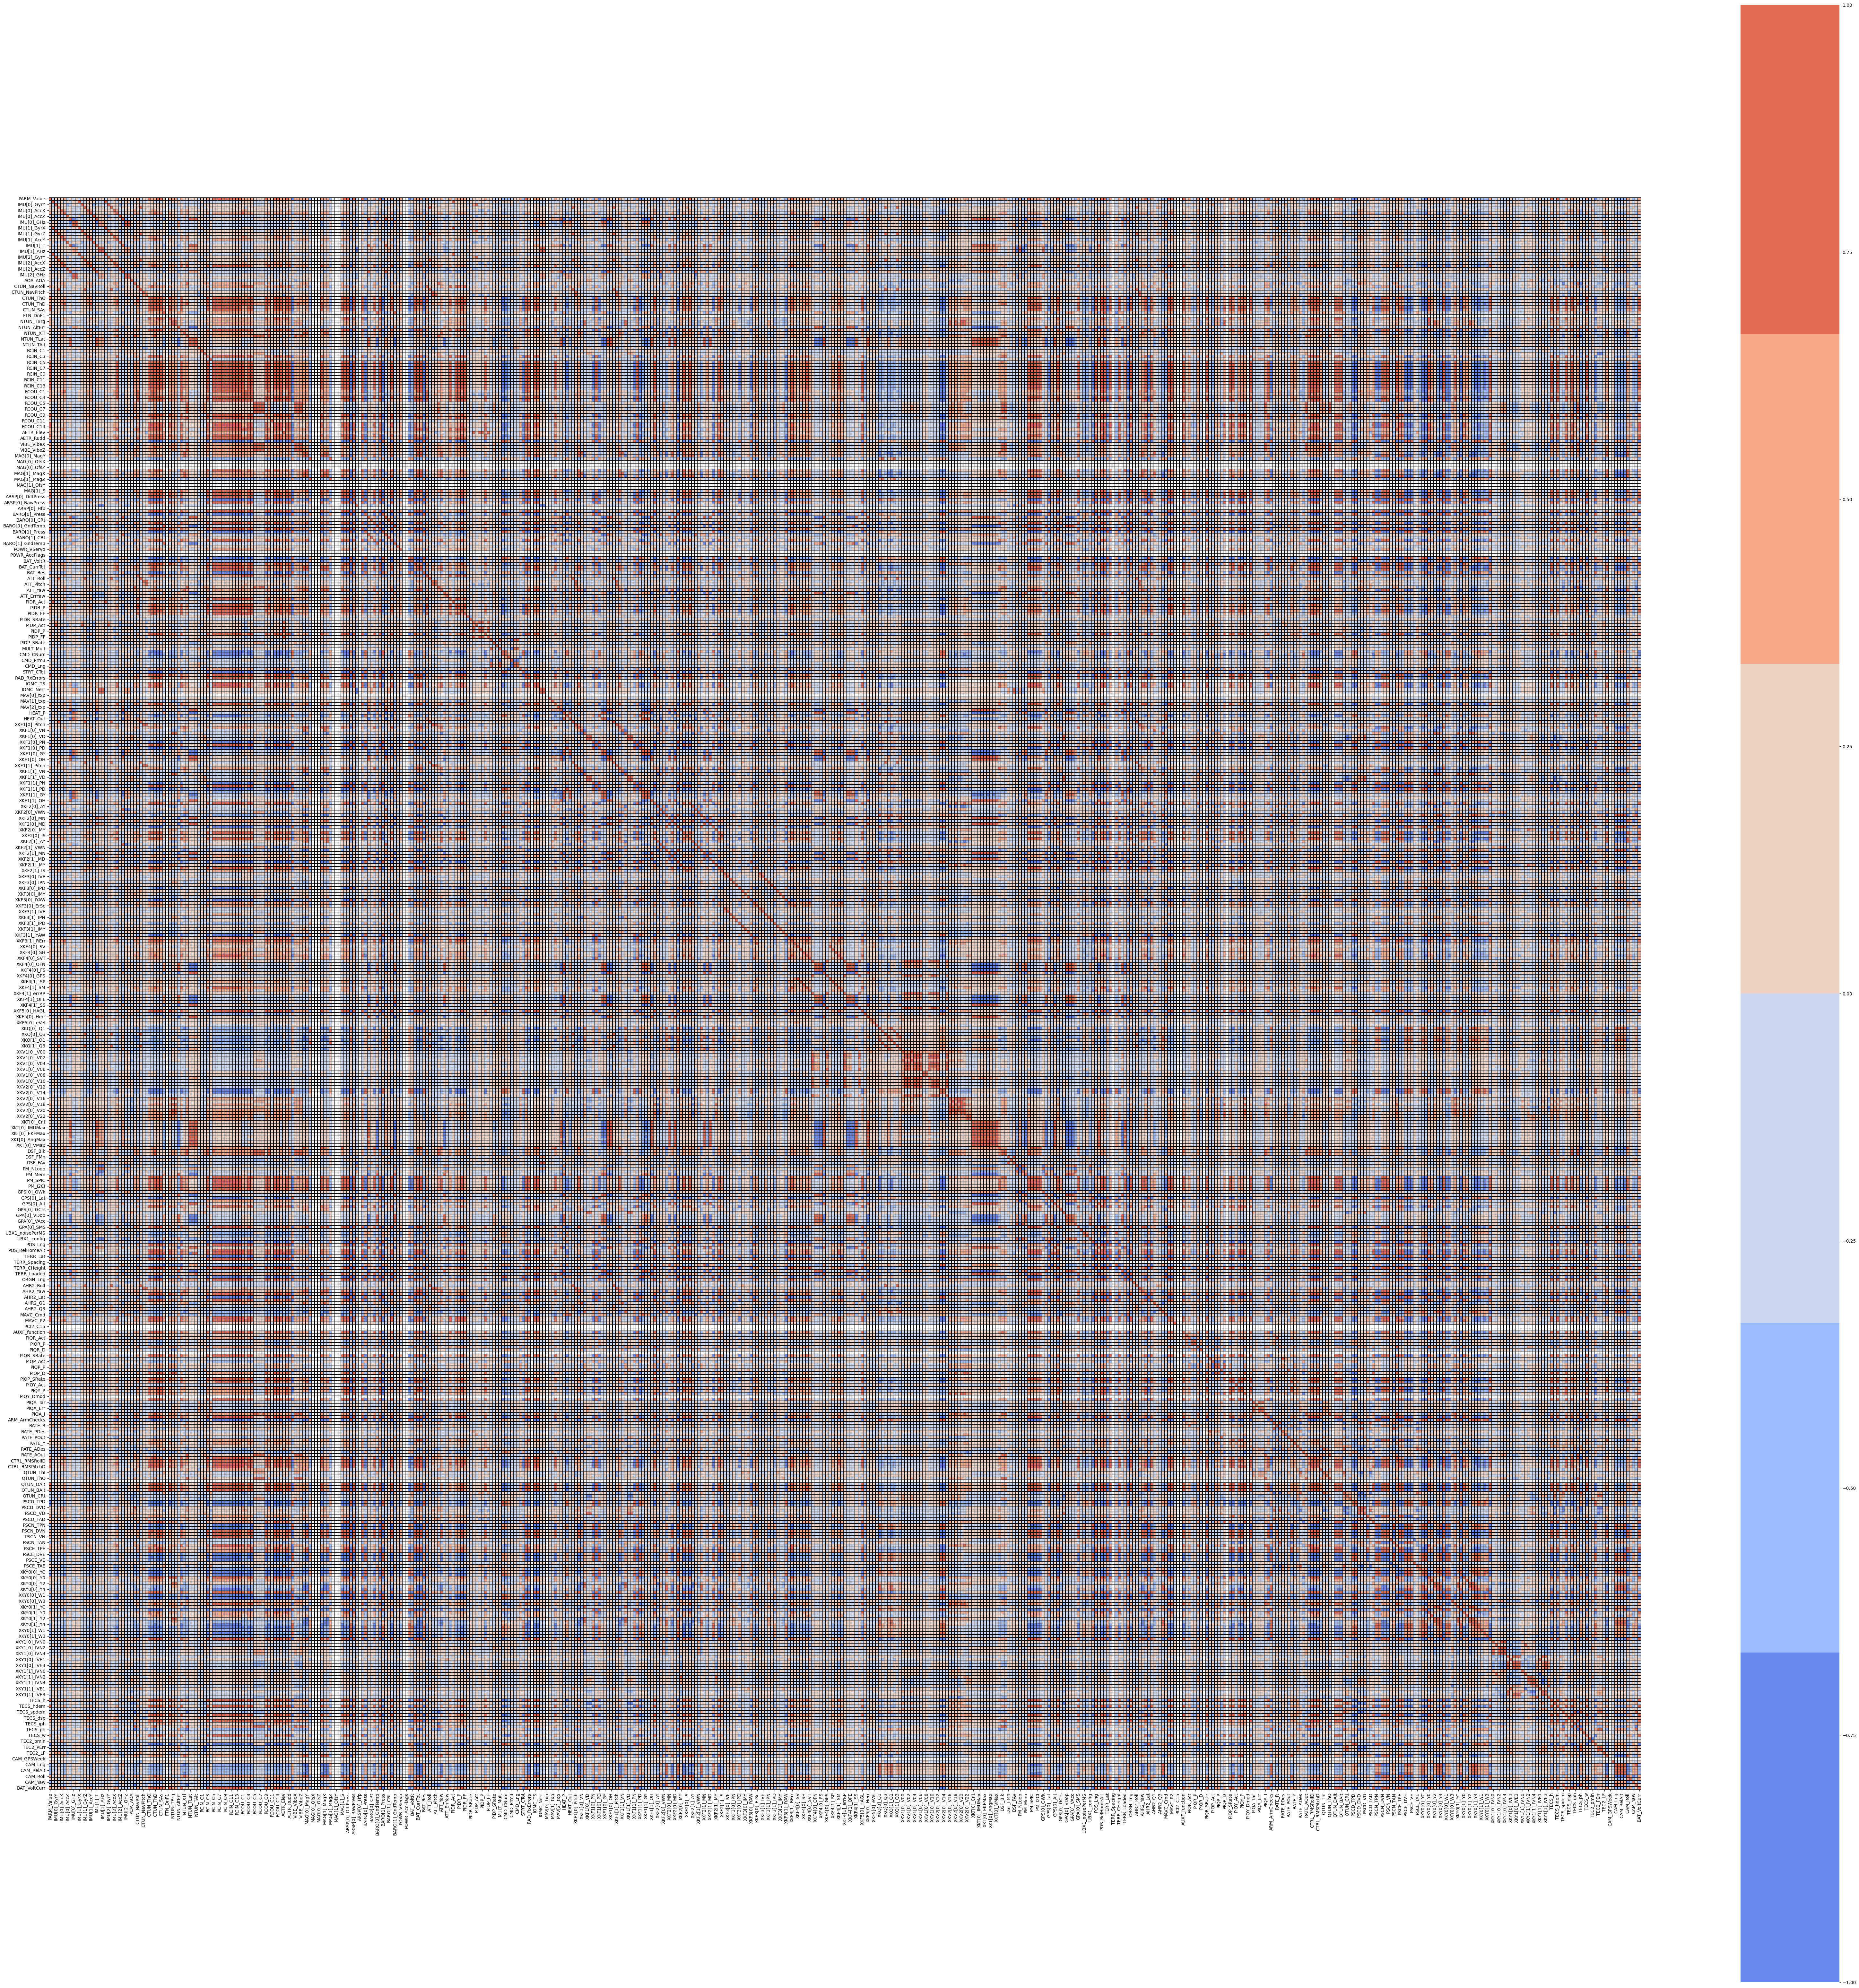

In [ ]:
plt.figure(figsize=(80,80))
sns.heatmap(correlation_all_parameter,
            square=True,
            linewidths=0.25,
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=False)

In [ ]:
correlation_with_powr = correlation_all_parameter.loc[correlation_all_parameter.index != 'BAT_VoltCurr', 'BAT_VoltCurr'].to_frame()  #ในข้อมูลพี่ริว คือ 21
correlation_with_powr['Abs_Corr'] = correlation_with_powr["BAT_VoltCurr"].abs()
correlation_with_powr

,BAT_VoltCurr,Abs_Corr
IMU_GyrX,-0.014358,0.014358
IMU_GyrY,0.060860,0.060860
IMU_GyrZ,-0.067216,0.067216
IMU_AccX,0.832864,0.832864
IMU_AccY,-0.050770,0.050770
...,...,...
PSCD_TVD,0.354601,0.354601
PSCD_VD,-0.212007,0.212007
PSCD_DAD,0.212838,0.212838
PSCD_TAD,0.524053,0.524053


In [ ]:
sorted_correlation_with_powr = correlation_with_powr.sort_values(by='Abs_Corr', ascending=False)

sorted_correlation_with_powr.drop('Abs_Corr',axis = 1 ,inplace = True)

sorted_correlation_with_powr = sorted_correlation_with_powr.iloc[:100].copy()
sorted_correlation_with_powr.loc[:, 'rank'] = range(1, 101)
sorted_correlation_with_powr.drop('BAT_VoltCurr',axis = 1 ,inplace = True)


In [ ]:
sorted_correlation_with_powr

,rank
BAT_Curr,1
RCOU_C9,2
RCOU_C13,3
RCOU_C14,4
AETR_Thr,5
...,...
NKT1_Cnt,96
XKT_VMin,97
CTUN_Aspd,98
NKT2_AngMin,99


In [ ]:
sorted_correlation_with_powr.loc['ARSP_Airspeed']

In [ ]:
sorted_correlation_with_powr

,BAT_VoltCurr
BAT_Curr,0.997712
RCOU_C9,0.879126
RCOU_C14,0.879037
RCOU_C13,0.879037
IMU3_AccX,0.875160
...,...
IOMC_Nerr,NaN
IOMC_Nerr2,NaN
TERR_Spacing,NaN
ARM_ArmChecks,NaN


In [ ]:
sorted_correlation_with_powr['index'] = sorted_correlation_with_powr.index.str.replace(r'\[.*?\]', '')
sorted_correlation_with_powr.insert(0, 'definition', sorted_correlation_with_powr['index'].map(data_dict))
sorted_correlation_with_powr

<ipython-input-27-53761cb295e9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sorted_correlation_with_powr['index'] = sorted_correlation_with_powr.index.str.replace(r'\[.*?\]', '')


,definition,BAT_VoltCurr,index
BAT_Curr,measured current,0.997712,BAT_Curr
RCOU_C9,channel 9 output,0.879126,RCOU_C9
RCOU_C14,channel 14 output,0.879037,RCOU_C14
RCOU_C13,channel 13 output,0.879037,RCOU_C13
IMU3_AccX,acceleration along X axis,0.875160,IMU3_AccX
...,...,...,...
IOMC_Nerr,Protocol failures on MCU side,NaN,IOMC_Nerr
IOMC_Nerr2,Reported number of failures on IOMCU side,NaN,IOMC_Nerr2
TERR_Spacing,terrain Tile spacing,NaN,TERR_Spacing
ARM_ArmChecks,arming bitmask at time of arming,NaN,ARM_ArmChecks


In [ ]:
sorted_correlation_with_powr.loc['MAV[0]_rxp']

definition      received packet count
BAT_VoltCurr                -0.242465
index                         MAV_rxp
Name: MAV[0]_rxp, dtype: object

In [ ]:
correlation_with_powr.loc['RCOU_C9']

BAT_VoltCurr    0.866052
Abs_Corr        0.866052
Name: RCOU_C9, dtype: float64

In [ ]:
# find correlation with BAT_EnrgTot

correlation_with_powr = []

for i in range(len(parameter_list) - 1) :
  correlation_list = []
  correlation_list.append(parameter_list[i])
  correlation_with_powr_cal = correlation_all_parameter['BAT_VoltCurr'][parameter_list[i]]
  correlation_list.append(correlation_with_powr_cal)
  correlation_with_powr.append(correlation_list)

print(len(correlation_with_powr))
print(correlation_with_powr)

477
[['IMU_GyrX', 0.007071286050009255], ['IMU_GyrY', 0.0737463476015317], ['IMU_GyrZ', 0.07790043312849455], ['IMU_AccX', 0.6435360407662428], ['IMU_AccY', -0.10208973336288757], ['IMU_AccZ', -0.11298804844467927], ['IMU_T', 0.1645928202338781], ['IMU_GHz', -0.11066733151197397], ['IMU_AHz', -0.10654405980143239], ['IMU2_GyrX', 0.007467182940552988], ['IMU2_GyrY', 0.07501531017970452], ['IMU2_GyrZ', 0.07906008672792997], ['IMU2_AccX', 0.6400942685288988], ['IMU2_AccY', -0.10112814457496058], ['IMU2_AccZ', -0.10888206398415706], ['IMU2_T', 0.16397824518167117], ['IMU2_GHz', -0.15086552009422993], ['IMU2_AHz', -0.1594831862671822], ['IMU3_GyrX', 0.005655884119841214], ['IMU3_GyrY', 0.08033254268952936], ['IMU3_GyrZ', 0.07739324923880862], ['IMU3_AccX', 0.7333822589541252], ['IMU3_AccY', -0.12797592535194655], ['IMU3_AccZ', -0.11840299629835369], ['IMU3_T', 0.15482280422759495], ['IMU3_GHz', -0.12090694073916287], ['IMU3_AHz', -0.10877774426470345], ['RATE_RDes', 0.35079211806823335], ['

In [ ]:
# filter parameter that correlation more than 0.3

high_correlation_filtering = []
high_correlation_filtering_score = []
abs_high_correlation_filtering_score = []

for i in range(len(correlation_with_powr)) :
  if abs(correlation_with_powr[i][1]) >= 0.20 :
    high_correlation_filtering.append(correlation_with_powr[i][0])
    high_correlation_filtering_score.append(correlation_with_powr[i][1])
    abs_high_correlation_filtering_score.append(abs(correlation_with_powr[i][1]))

print(len(high_correlation_filtering))
print(high_correlation_filtering)
print(len(high_correlation_filtering_score))
print(high_correlation_filtering_score)

163
['IMU_AccX', 'IMU2_AccX', 'IMU3_AccX', 'RATE_RDes', 'RATE_R', 'RATE_ROut', 'RATE_PDes', 'RATE_P', 'RATE_POut', 'RATE_Y', 'RATE_ADes', 'RATE_AOut', 'ATT_DesPitch', 'ATT_Pitch', 'ATT_DesYaw', 'ATT_ErrYaw', 'PIQR_I', 'PIQR_D', 'PIQP_Tar', 'PIQP_Act', 'PIQP_Err', 'PIQP_P', 'PIQY_Act', 'PIQY_I', 'PIQA_Tar', 'PIQA_Act', 'PIQA_Err', 'PIQA_P', 'PIQA_I', 'PIDP_Tar', 'PIDP_P', 'PIDP_I', 'PIDP_D', 'NKF1_Pitch', 'NKF1_PD', 'NKF1_GY', 'NKF1_GZ', 'NKF2_GSX', 'NKF2_GSY', 'NKF2_GSZ', 'NKF2_ME', 'NKF2_MD', 'NKF2_MX', 'NKF2_MZ', 'NKF3_IPD', 'NKF3_IMZ', 'NKF3_IYAW', 'NKF3_IVT', 'NKF4_SP', 'NKF5_HAGL', 'NKQ1_Q4', 'NKF6_PD', 'NKF7_GSX', 'NKF7_GSY', 'NKF7_ME', 'NKF7_MD', 'NKF7_MX', 'NKF8_IPD', 'NKF8_IYAW', 'NKF8_IVT', 'NKF9_SP', 'NKQ2_Q4', 'NK11_PD', 'NK11_GX', 'NK11_GZ', 'NK12_GSX', 'NK12_GSY', 'NK12_GSZ', 'NK12_MD', 'NK12_MX', 'NK13_IPD', 'NK13_IYAW', 'NK13_IVT', 'NK14_SP', 'NKQ3_Q4', 'NKT1_EKFMin', 'NKT2_EKFMin', 'NKT3_EKFMin', 'AHR2_Pitch', 'AHR2_Alt', 'POS_Alt', 'POS_RelHomeAlt', 'POS_RelOriginAlt'

In [ ]:
# create dict to match parameter with correlation score

sort_high_correlation_filtering = []
correlation_filtering_dict = dict()
abs_high_correlation_filtering_score.sort(reverse = True)

for i in range(len(correlation_with_powr)) :
  correlation_filtering_dict[correlation_with_powr[i][0]] = abs(correlation_with_powr[i][1])

# list out keys and values separately
correlation_key_list = list(correlation_filtering_dict.keys())
correlation_val_list = list(correlation_filtering_dict.values())

for i in range(len(abs_high_correlation_filtering_score)) :
  position = correlation_val_list.index(abs_high_correlation_filtering_score[i])
  sort_high_correlation_filtering.append(correlation_key_list[position])

print(sort_high_correlation_filtering)
print(len(sort_high_correlation_filtering))

# print(correlation_filtering_dict)
# print(abs_high_correlation_filtering_score)

# position = correlation_val_list.index(-0.035031023642426495)
# print(correlation_key_list[position])
# print(correlation_val_list)

['BAT_Curr', 'RCOU_C9', 'RCOU_C13', 'RCOU_C13', 'CTUN_ThrOut', 'AETR_Thr', 'TECS_th', 'IMU3_AccX', 'IMU_AccX', 'IMU2_AccX', 'VIBE_VibeZ', 'NTUN_AltErr', 'QTUN_BAlt', 'QTUN_Alt', 'QTUN_DAlt', 'NTUN_AspdE', 'RCIN_C3', 'PSC_PX', 'GPS_Spd', 'ARSP_Airspeed', 'CMD_Alt', 'CTUN_Aspd', 'ARSP_RawPress', 'AETR_Elev', 'ARSP_DiffPress', 'RCOU_C4', 'TECS_hdem', 'CTRL_RMSPitchD', 'TECS_dhdem', 'PIQP_Tar', 'TECS_dsp', 'PIQP_Err', 'PIQP_P', 'PIQA_Act', 'HEAT_I', 'CTRL_RMSRollD', 'PIDP_I', 'NKF7_MX', 'TEC2_PErr', 'PSC_PY', 'CTRL_RMSPitchP', 'RCOU_C3', 'NK12_MX', 'BARO_Press', 'RCIN_C5', 'AHR2_Alt', 'BARO_Alt', 'BAR2_Press', 'BAR2_Alt', 'GPS_Alt', 'POS_Alt', 'NKF6_PD', 'NK11_PD', 'NKF1_PD', 'POS_RelHomeAlt', 'POS_RelHomeAlt', 'NKF5_HAGL', 'ATT_DesYaw', 'DSF_Bytes', 'DSF_Blk', 'STAT_isFlyProb', 'NKF2_MX', 'CTUN_RdrOut', 'AETR_Rudd', 'NKF2_MD', 'VIBE_VibeX', 'BAT_Res', 'RATE_ADes', 'RCOU_C6', 'RCOU_C8', 'RCOU_C7', 'PIQP_Act', 'NKF8_IPD', 'NKF3_IPD', 'NKF8_IYAW', 'NK12_MD', 'RCOU_C5', 'RATE_RDes', 'NK13_IYA

In [8]:
files = glob.glob(f"drive/My Drive/Senior Project/Complete_combine/2_to_filter_mode/*.csv")
filepath = 'drive/My Drive/Senior Project/Complete_combine/filter_mode_to_phase/no_climb.csv'

phase_df = pd.DataFrame()


for file in files:
    df = pd.read_csv(file)
    #for 4.1.5
    columns_to_remove = df.filter(regex=r'\[.*[1-9].*\]').columns #ลบที่ไม่ใช่ [0merge]
    df.drop(columns=columns_to_remove, inplace=True)

    df.rename(columns=lambda x: x.replace(r'[0]', ''), inplace=True)

    #for 4.0.8
    columns_to_remove = df.filter(regex=r'^IMU(\d+)').columns
    df.drop(columns=columns_to_remove, inplace=True)
    df.rename(columns=lambda x: re.sub(r'^NKF(\d+)', r'XKF\1', x), inplace=True)


    filtered_df = df[df['TECS_dh'] < 1].drop(columns=['TimeUS'])
    phase_df = pd.concat([phase_df, filtered_df])

    # phase_df.to_csv(filepath, index=True)

In [196]:
phase_df

,IMU_GyrX,IMU_GyrY,IMU_GyrZ,IMU_AccX,IMU_AccY,IMU_AccZ,IMU_EG,IMU_EA,IMU_T,IMU_GHz,...,PM_Ex,QTUN_Sscl,PSCD_TPD,PSCD_PD,PSCD_DVD,PSCD_TVD,PSCD_VD,PSCD_DAD,PSCD_TAD,PSCD_AD
765,-0.636056,-0.296320,0.083804,0.028076,0.315510,-6.574552,0,0,50.89222,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,-0.372304,-0.293935,0.060367,-0.687005,0.509251,-5.650390,0,0,50.88937,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,-0.192166,0.046339,0.021832,-0.282436,0.394145,-5.125965,0,0,50.88906,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,-0.082395,0.211138,-0.012195,-0.259242,0.400299,-8.571963,0,0,50.89001,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,-0.011564,0.113162,-0.035860,-0.552502,0.649396,-10.699450,0,0,50.89030,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,0.013701,-0.042942,0.007541,0.336339,0.649586,-9.799566,0,0,44.87757,8032,...,0.0,0.0,0.410268,0.400516,0.0,0.009752,0.030923,0.0,-0.113173,-0.036573
6413,0.008215,-0.049347,0.005170,1.062206,1.100587,-10.154850,0,0,44.87419,8032,...,0.0,0.0,0.410268,0.402001,0.0,0.008267,0.040251,0.0,-0.126234,0.220550
6414,0.001314,-0.048434,0.003576,0.205274,0.811976,-9.765584,0,0,44.87576,8032,...,0.0,0.0,0.410268,0.404218,0.0,0.006050,0.032661,0.0,-0.142700,0.347426
6415,-0.000763,-0.060557,0.002839,0.062731,1.226167,-10.067140,0,0,44.88554,8032,...,0.0,0.0,0.410268,0.405078,0.0,0.005190,0.022764,0.0,-0.137060,-0.282687


In [197]:
filename = "drive/My Drive/Senior Project/Complete_combine/filter_mode_to_phase/no_climb.csv"
direct_phase = pd.DataFrame()
turn_phase = pd.DataFrame()

df = pd.read_csv(filename,index_col=0)
direct_phase = df[df['ATT_Roll'] <= 10]
turn_phase = df[df['ATT_Roll'] > 10]
direct_phase.to_csv("drive/My Drive/Senior Project/Complete_combine/filter_mode_to_phase/no_climb+direct_phase.csv", index=True)
turn_phase.to_csv("drive/My Drive/Senior Project/Complete_combine/filter_mode_to_phase/no_climb+turn_phase.csv", index=True)

In [ ]:
direct_phase

,Unnamed: 0,IMU_GyrX,IMU_GyrY,IMU_GyrZ,IMU_AccX,IMU_AccY,IMU_AccZ,IMU_EG,IMU_EA,IMU_T,...,PM_Ex,QTUN_Sscl,PSCD_TPD,PSCD_PD,PSCD_DVD,PSCD_TVD,PSCD_VD,PSCD_DAD,PSCD_TAD,PSCD_AD
0,0,0.031666,0.035899,0.021422,1.514652,0.663261,-7.475840,0,0,50.56600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.052483,-0.033312,0.009444,-1.480070,0.085301,-11.575630,0,0,50.57003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-0.051328,-0.014093,-0.016756,-0.500886,0.999917,-9.864394,0,0,50.56992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.033591,-0.080896,0.014970,-1.164098,1.626642,-11.262980,0,0,50.56979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,-0.017764,0.022335,0.018198,0.314614,1.770629,-7.721035,0,0,50.56973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,6080,-0.649513,-0.021031,0.025782,0.561765,0.449085,-12.309500,0,0,44.83682,...,0.0,0.0,-64.41960,-62.70462,0.416833,-1.298152,-1.352793,2.050001,1.389838,-1.857739
13465,6081,-0.528909,-0.191955,0.016886,0.413072,-1.236574,-10.408430,0,0,44.83505,...,0.0,0.0,-64.34877,-62.86335,0.712500,-0.772919,-1.443344,2.500000,5.124187,-0.537107
13466,6082,-0.249531,-0.396115,0.042355,0.565963,0.445704,-9.776011,0,0,44.82970,...,0.0,0.0,-64.27766,-62.97359,0.926955,-0.377112,-1.416116,2.346090,6.872197,0.683357
13467,6083,0.046771,-0.489010,0.037624,0.021760,-1.382000,-7.661908,0,0,44.83185,...,0.0,0.0,-64.14287,-63.11467,1.190244,0.162045,-1.190117,1.819513,8.208980,2.936228


In [ ]:
phase_df

,IMU_GyrX,IMU_GyrY,IMU_GyrZ,IMU_AccX,IMU_AccY,IMU_AccZ,IMU_EG,IMU_EA,IMU_T,IMU_GHz,...,PM_Ex,QTUN_Sscl,PSCD_TPD,PSCD_PD,PSCD_DVD,PSCD_TVD,PSCD_VD,PSCD_DAD,PSCD_TAD,PSCD_AD
0,0.031666,0.035899,0.021422,1.514652,0.663261,-7.475840,0,0,50.56600,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.052483,-0.033312,0.009444,-1.480070,0.085301,-11.575630,0,0,50.57003,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.051328,-0.014093,-0.016756,-0.500886,0.999917,-9.864394,0,0,50.56992,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.033591,-0.080896,0.014970,-1.164098,1.626642,-11.262980,0,0,50.56979,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.017764,0.022335,0.018198,0.314614,1.770629,-7.721035,0,0,50.56973,7961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6080,-0.649513,-0.021031,0.025782,0.561765,0.449085,-12.309500,0,0,44.83682,8032,...,0.0,0.0,-64.41960,-62.70462,0.416833,-1.298152,-1.352793,2.050001,1.389838,-1.857739
6081,-0.528909,-0.191955,0.016886,0.413072,-1.236574,-10.408430,0,0,44.83505,8032,...,0.0,0.0,-64.34877,-62.86335,0.712500,-0.772919,-1.443344,2.500000,5.124187,-0.537107
6082,-0.249531,-0.396115,0.042355,0.565963,0.445704,-9.776011,0,0,44.82970,8032,...,0.0,0.0,-64.27766,-62.97359,0.926955,-0.377112,-1.416116,2.346090,6.872197,0.683357
6083,0.046771,-0.489010,0.037624,0.021760,-1.382000,-7.661908,0,0,44.83185,8032,...,0.0,0.0,-64.14287,-63.11467,1.190244,0.162045,-1.190117,1.819513,8.208980,2.936228


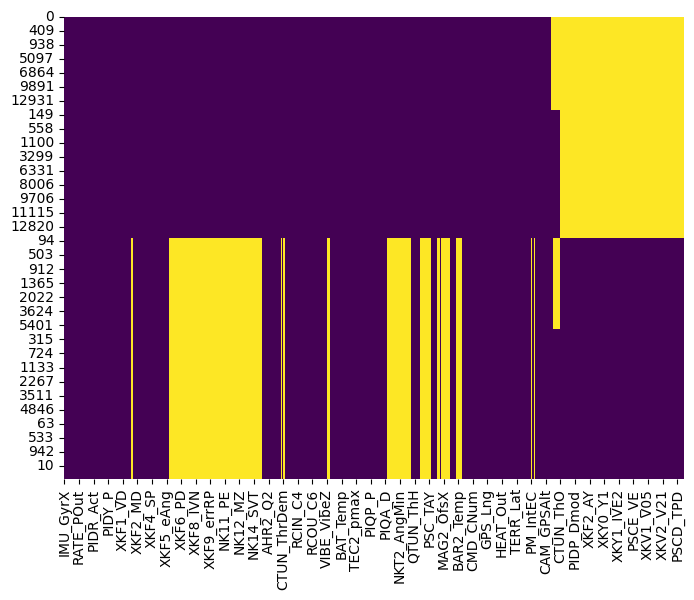

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(phase_df.isnull(), cmap='viridis', cbar=False)
plt.show()

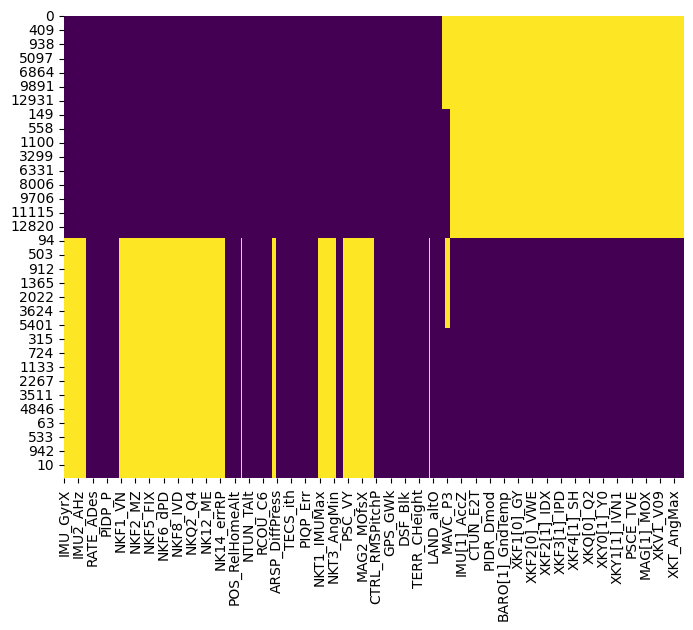

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(phase_df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [ ]:
na_mask = phase_df.isna()
result_sum_na = na_mask.sum(axis=0)
print(result_sum_na)

IMU_GyrX    7019
IMU_GyrY    7019
IMU_GyrZ    7019
IMU_AccX    7019
IMU_AccY    7019
            ... 
PSCD_TVD    6450
PSCD_VD     6450
PSCD_DAD    6450
PSCD_TAD    6450
PSCD_AD     6450
Length: 750, dtype: int64


In [ ]:
print(result_sum_na.unique())

[7019    0   10 2714 5356 6450]


In [ ]:
print(phase_df['BAT_EnrgDiff'])

0       0.000000
1       0.000000
2       0.000209
3       0.001043
4       0.000614
          ...   
6080    0.000510
6081    0.000380
6082    0.000450
6083    0.000430
6084    0.000520
Name: BAT_EnrgDiff, Length: 13469, dtype: float64


In [ ]:
nan_columns = phase_df.columns[phase_df.isna().any()].tolist()
print(nan_columns)

['XKF2_GSX', 'XKF2_GSY', 'XKF2_GSZ', 'NKQ1_Q1', 'NKQ1_Q2', 'NKQ1_Q3', 'NKQ1_Q4', 'XKF6_Roll', 'XKF6_Pitch', 'XKF6_Yaw', 'XKF6_VN', 'XKF6_VE', 'XKF6_VD', 'XKF6_dPD', 'XKF6_PN', 'XKF6_PE', 'XKF6_PD', 'XKF6_GX', 'XKF6_GY', 'XKF6_GZ', 'XKF6_OH', 'XKF7_GSX', 'XKF7_GSY', 'XKF7_GSZ', 'XKF7_VWN', 'XKF7_VWE', 'XKF7_MN', 'XKF7_ME', 'XKF7_MD', 'XKF7_MX', 'XKF7_MY', 'XKF7_MZ', 'XKF8_IVN', 'XKF8_IVE', 'XKF8_IVD', 'XKF8_IPN', 'XKF8_IPE', 'XKF8_IPD', 'XKF8_IMX', 'XKF8_IMY', 'XKF8_IMZ', 'XKF8_IYAW', 'XKF8_IVT', 'XKF9_SV', 'XKF9_SP', 'XKF9_SH', 'XKF9_SM', 'XKF9_SVT', 'XKF9_errRP', 'XKF9_FS', 'XKF9_SS', 'XKF9_GPS', 'NKQ2_Q1', 'NKQ2_Q2', 'NKQ2_Q3', 'NKQ2_Q4', 'NK11_Roll', 'NK11_Pitch', 'NK11_Yaw', 'NK11_VN', 'NK11_VE', 'NK11_VD', 'NK11_dPD', 'NK11_PN', 'NK11_PE', 'NK11_PD', 'NK11_GX', 'NK11_GY', 'NK11_GZ', 'NK11_OH', 'NK12_GSX', 'NK12_GSY', 'NK12_GSZ', 'NK12_VWN', 'NK12_VWE', 'NK12_MN', 'NK12_ME', 'NK12_MD', 'NK12_MX', 'NK12_MY', 'NK12_MZ', 'NK13_IVN', 'NK13_IVE', 'NK13_IVD', 'NK13_IPN', 'NK13_IPE', 'NK1

In [ ]:
import pandas as pd

data = {'ClimbRate': [0.5, 1.2, 1.8, 0.9, 1.5, 1.2, 1.7, 1.1, 1.8, 1.3]}
df = pd.DataFrame(data)

# หาแถวที่ climb rate เกิน 1 และต่อเนื่องกัน 5 แถว
condition = (df['ClimbRate'] > 1)
filtered_rows = df.groupby((~condition).cumsum())
for group_name, group_data in filtered_rows:
    print(f"Group {group_name}:\n{group_data}\n")

Group 1:
   ClimbRate
0        0.5
1        1.2
2        1.8

Group 2:
   ClimbRate
3        0.9
4        1.5
5        1.2
6        1.7
7        1.1
8        1.8
9        1.3



# Feature Selection (not used)

In [ ]:
X = df.drop(['TimeUS','BAT_EnrgDiff'],errors='ignore', axis = 1)
X.fillna(0, inplace=True)
X = X.loc[:, (X != 0).any(axis=0)]
Y = X['BAT_VoltCurr']
X = X.drop('BAT_VoltCurr', axis=1)

In [ ]:
X

,IMU_GyrX,IMU_GyrY,IMU_GyrZ,IMU_AccX,IMU_AccY,IMU_AccZ,IMU_T,IMU_GHz,IMU_AHz,RATE_RDes,...,XKT_VMin,XKT_VMax,PSCD_TPD,PSCD_PD,PSCD_DVD,PSCD_TVD,PSCD_VD,PSCD_DAD,PSCD_TAD,PSCD_AD
0,0.031666,0.035899,0.021422,1.514652,0.663261,-7.475840,50.56600,7961,3980,1.166667,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.052483,-0.033312,0.009444,-1.480070,0.085301,-11.575630,50.57003,7961,3980,1.433333,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.051328,-0.014093,-0.016756,-0.500886,0.999917,-9.864394,50.56992,7961,3980,0.566667,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.033591,-0.080896,0.014970,-1.164098,1.626642,-11.262980,50.56979,7961,3980,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.017764,0.022335,0.018198,0.314614,1.770629,-7.721035,50.56973,7961,3980,-0.166667,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6080,-0.649513,-0.021031,0.025782,0.561765,0.449085,-12.309500,44.83682,8032,4016,-8.179414,...,0.00996,0.013944,-64.41960,-62.70462,0.416833,-1.298152,-1.352793,2.050001,1.389838,-1.857739
6081,-0.528909,-0.191955,0.016886,0.413072,-1.236574,-10.408430,44.83505,8032,4016,6.026089,...,0.00996,0.013944,-64.34877,-62.86335,0.712500,-0.772919,-1.443344,2.500000,5.124187,-0.537107
6082,-0.249531,-0.396115,0.042355,0.565963,0.445704,-9.776011,44.82970,8032,4016,12.616800,...,0.00996,0.013944,-64.27766,-62.97359,0.926955,-0.377112,-1.416116,2.346090,6.872197,0.683357
6083,0.046771,-0.489010,0.037624,0.021760,-1.382000,-7.661908,44.83185,8032,4016,16.742630,...,0.00996,0.013944,-64.14287,-63.11467,1.190244,0.162045,-1.190117,1.819513,8.208980,2.936228


In [ ]:
Y

0        0.000000
1        0.000000
2        6.943526
3       35.458811
4       20.888022
          ...    
6080    18.232905
6081    13.861279
6082    16.140659
6083    15.736629
6084    18.667553
Name: BAT_VoltCurr, Length: 13469, dtype: float64

**PCA**


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
temp = X.values
sc = StandardScaler()
X_norm = sc.fit_transform(temp)

In [ ]:
pca = PCA()
pca.fit(X_norm)

PCA()

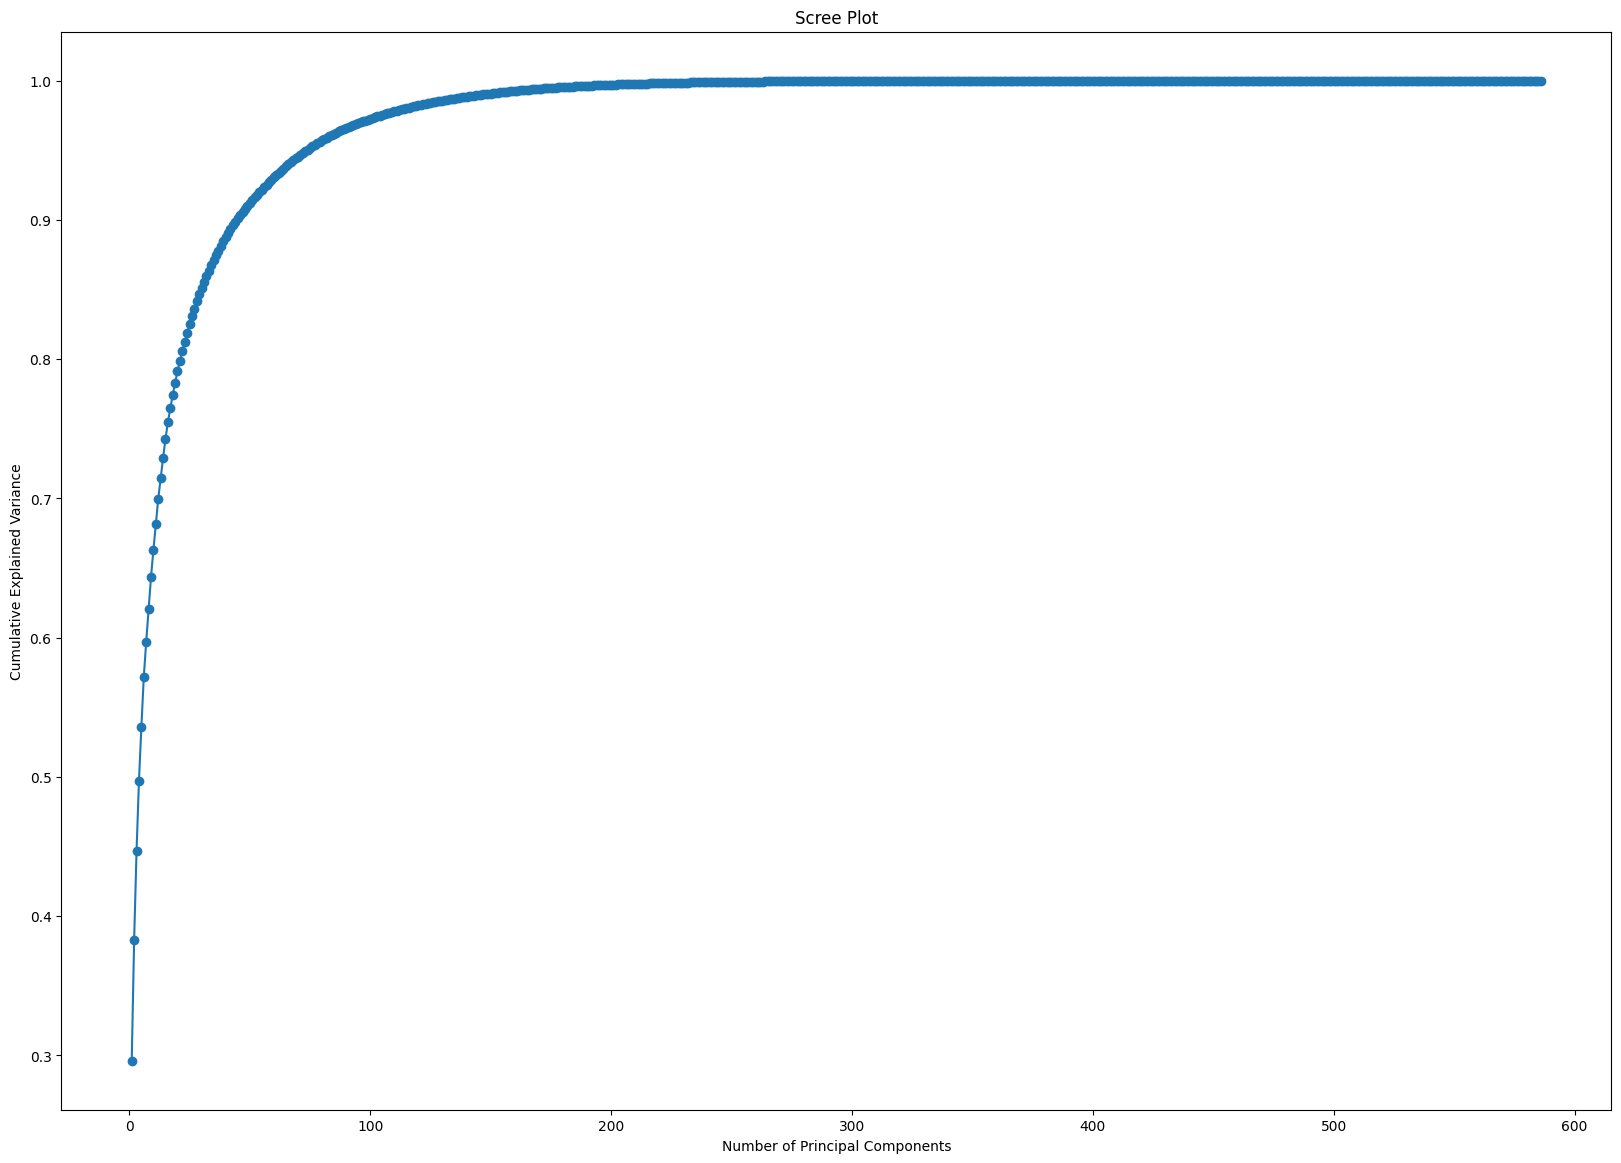

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(20, 14))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components=2)

# Fit and transform your data
X_pca = pca.fit_transform(X_norm)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.29623997 0.08686808]


In [163]:
X_pca.shape

(13469, 2)

In [ ]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=X.columns)
loadings_df

,IMU_GyrX,IMU_GyrY,IMU_GyrZ,IMU_AccX,IMU_AccY,IMU_AccZ,IMU_T,IMU_GHz,IMU_AHz,RATE_RDes,...,XKT_VMin,XKT_VMax,PSCD_TPD,PSCD_PD,PSCD_DVD,PSCD_TVD,PSCD_VD,PSCD_DAD,PSCD_TAD,PSCD_AD
0,0.003076,-0.003845,-0.003069,-0.024119,-0.001296,-0.001662,0.018137,-0.046134,-0.046328,-0.005685,...,-0.075964,-0.075996,0.056433,0.056912,-0.004866,-0.041668,0.012298,-0.014621,-0.052173,-0.010815
1,0.003690,0.000015,-0.013337,0.024018,-0.034068,-0.006154,0.081273,0.108446,0.108020,0.008996,...,-0.010619,-0.010707,0.010760,0.010629,-0.007231,-0.005302,-0.006050,0.001306,0.000784,-0.000958


In [ ]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=X.columns)
sorted_loadings = loadings_df.T
# sorted_loadings_pc1 = loadings_df.T['1'].sort_values(ascending=False)

sorted_loadings.loc[:,0].sort_values(ascending=False)

NKT3_EKFMax    0.076162
NKT2_EKFMax    0.076155
NKT1_EKFMax    0.076139
NKT3_EKFMin    0.076126
XKF7_MN        0.076123
                 ...   
IOMC_Mem      -0.075999
RCI2_C15      -0.075999
XKT_EKFMin    -0.075999
XKT_EKFMax    -0.076002
CTUN_E2T      -0.076011
Name: 0, Length: 586, dtype: float64

---------------direct-----------------

In [166]:
X = direct_phase.drop(['TimeUS','BAT_EnrgDiff'],errors='ignore', axis = 1)
X.fillna(0, inplace=True)
X = X.loc[:, (X != 0).any(axis=0)]
Y = X['BAT_VoltCurr']
X = X.drop('BAT_VoltCurr', axis=1)

In [167]:
temp = X.values
sc = StandardScaler()
X_norm = sc.fit_transform(temp)

pca = PCA(n_components=2)
# Fit and transform your data
X_pca = pca.fit_transform(X_norm)

loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=X.columns)


loadings_df = pd.DataFrame(loadings, columns=X.columns)
sorted_loadings = loadings_df.T
# sorted_loadings_pc1 = loadings_df.T['1'].sort_values(ascending=False)

sorted_loadings.loc[:,0].sort_values(ascending=False)

NKT3_EKFMax    0.076268
NKT2_EKFMax    0.076263
NKT1_EKFMax    0.076248
NKT3_EKFMin    0.076238
XKF7_MN        0.076238
                 ...   
IOMC_Mem      -0.076123
RCIN_C8       -0.076123
RCIN_C12      -0.076123
RCIN_C11      -0.076123
CTUN_E2T      -0.076137
Name: 0, Length: 586, dtype: float64

---------------turn-----------------

In [168]:
X = turn_phase.drop(['TimeUS','BAT_EnrgDiff'],errors='ignore', axis = 1)
X.fillna(0, inplace=True)
X = X.loc[:, (X != 0).any(axis=0)]
Y = X['BAT_VoltCurr']
X = X.drop('BAT_VoltCurr', axis=1)

In [171]:
temp = X.values
sc = StandardScaler()
X_norm = sc.fit_transform(temp)

pca = PCA(n_components=2)
# Fit and transform your data
X_pca = pca.fit_transform(X_norm)

loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=X.columns)


loadings_df = pd.DataFrame(loadings, columns=X.columns)
sorted_loadings = loadings_df.T
# sorted_loadings_pc1 = loadings_df.T['1'].sort_values(ascending=False)

sorted_loadings.loc[:,0].sort_values(ascending=False)

NKT3_EKFMax    0.066393
NKT2_EKFMax    0.066388
NKT1_EKFMax    0.066378
NKT3_EKFMin    0.066367
NKT1_EKFMin    0.066367
                 ...   
XKT_VMax      -0.066275
XKT_AngMax    -0.066275
XKT_EKFMin    -0.066277
XKT_EKFMax    -0.066279
PIQR_SRate    -0.066313
Name: 0, Length: 583, dtype: float64

**random forest**

In [179]:
X = df.drop(['TimeUS','BAT_EnrgDiff'],errors='ignore', axis = 1)
X.fillna(0, inplace=True)
X = X.loc[:, (X != 0).any(axis=0)]
y = X['BAT_VoltCurr']
X = X.drop('BAT_VoltCurr', axis=1)

In [180]:
y

0        0.000000
1        0.000000
2        6.943526
3       35.458811
4       20.888022
          ...    
6080    18.232905
6081    13.861279
6082    16.140659
6083    15.736629
6084    18.667553
Name: BAT_VoltCurr, Length: 13469, dtype: float64

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.380403415631911


In [194]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['poisson', 'friedman_mse', 'absolute_error', 'squared_error']
}

rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

KeyboardInterrupt: ignored

In [ ]:
plt.barh(df.columns, rf_regressor.feature_importances_)
# sorted_idx = rf.feature_importances_.argsort()
# plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")

---------------direct--------------

In [ ]:
X = direct_phase.drop(['TimeUS','BAT_EnrgDiff'],errors='ignore', axis = 1)
X.fillna(0, inplace=True)
X = X.loc[:, (X != 0).any(axis=0)]
y = X['BAT_VoltCurr']
X = X.drop('BAT_VoltCurr', axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

----------turn----------

In [ ]:
X = turn_phase.drop(['TimeUS','BAT_EnrgDiff'],errors='ignore', axis = 1)
X.fillna(0, inplace=True)
X = X.loc[:, (X != 0).any(axis=0)]
y = X['BAT_VoltCurr']
X = X.drop('BAT_VoltCurr', axis=1)

**Wrapper Methods : Forward Feature Selection**

In [ ]:
df_forward_feature_selection = result_df.copy()

X = df_forward_feature_selection[df_forward_feature_selection.columns]
X = X.fillna(0)
y = df_forward_feature_selection['BAT_VoltCurr']

fstat, pval = f_regression(X, y)

In [ ]:
# print(fstat, pval)
print(X.columns[5])
print(fstat[5])

IMU_AccZ
1118.6397683230302


In [ ]:
f_value_threshold = 5000  # can adjust this value
updated_vars_ffs = []
high_ffs_score = []

for i in range(0, len(parameter_list_ffs) - 1) :

    if fstat[i] >= f_value_threshold :
        updated_vars_ffs.append(df_forward_feature_selection[parameter_list_ffs].columns[i])
        high_ffs_score.append(fstat[i])

print(len(updated_vars_ffs))
updated_vars_ffs

23


['ATT_DesPitch',
 'ATT_Pitch',
 'AHR2_Pitch',
 'CTUN_NavPitch',
 'CTUN_Pitch',
 'NTUN_AspdE',
 'RCOU_C9',
 'RCOU_C13',
 'RCOU_C14',
 'AETR_Thr',
 'BAT_Curr',
 'PIQA_Tar',
 'PIQA_Err',
 'PIQA_P',
 'BAT_EnrgDiff',
 'IMU[0]_AccX',
 'IMU[1]_AccX',
 'IMU[2]_AccX',
 'CTUN_ThO',
 'XKF1[0]_Pitch',
 'XKF1[1]_Pitch',
 'XKF2[0]_MX',
 'XKF2[1]_MX']

In [ ]:
ffs_parameter = updated_vars_ffs

In [ ]:
# create dict to match parameter with forward feature selection

sort_high_ffs = []
ffs_dict = dict()
high_ffs_score.sort(reverse = True)

for i in range(len(parameter_list_ffs)) :
  ffs_dict[parameter_list_ffs[i]] = fstat[i]

# list out keys and values separately
ffs_key_list = list(ffs_dict.keys())
ffs_val_list = list(ffs_dict.values())

for i in range(len(high_ffs_score)) :
  position = ffs_val_list.index(high_ffs_score[i])
  sort_high_ffs.append(ffs_key_list[position])

print(sort_high_ffs)

['BAT_Curr', 'BAT_EnrgDiff', 'RCOU_C9', 'RCOU_C13', 'RCOU_C13', 'AETR_Thr', 'IMU[2]_AccX', 'IMU[0]_AccX', 'IMU[1]_AccX', 'CTUN_ThO', 'ATT_DesPitch', 'CTUN_NavPitch', 'XKF1[1]_Pitch', 'XKF1[0]_Pitch', 'NTUN_AspdE', 'PIQA_Err', 'PIQA_P', 'XKF2[0]_MX', 'XKF2[1]_MX', 'AHR2_Pitch', 'PIQA_Tar', 'CTUN_Pitch', 'ATT_Pitch']


**Wrapper Methods : Recursive Feature Elimination**

In [ ]:
df_forward_recursive_feature_elimination = result_df.copy()
parameter_list_rfe = df_forward_recursive_feature_elimination.columns

X = df_forward_recursive_feature_elimination[parameter_list_rfe]
y = df_forward_recursive_feature_elimination['BAT_VoltCurr']
X = X.fillna(0)
n_features = 150  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X, y)

In [ ]:
model.ranking_

In [ ]:
model.estimator_.coef_

In [ ]:
print(parameter_list_rfe[4:6])
print(model.ranking_[4:6])
print(model.estimator_.coef_[4:6])

In [ ]:
updated_vars = []
for i in range(0,len(parameter_list_rfe)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df_forward_recursive_feature_elimination[parameter_list_rfe].columns[i])
updated_vars

['IMU_GyrX',
 'IMU_GyrY',
 'IMU_GyrZ',
 'IMU_AccX',
 'IMU_AccZ',
 'IMU_T',
 'IMU2_GyrX',
 'IMU2_GyrY',
 'IMU2_GyrZ',
 'IMU2_AccX',
 'IMU2_AccZ',
 'IMU2_T',
 'IMU3_GyrX',
 'IMU3_GyrY',
 'IMU3_GyrZ',
 'RATE_POut',
 'RATE_AOut',
 'ATT_ErrRP',
 'NKF1_GX',
 'NKF1_GZ',
 'NKF2_GSY',
 'NKF2_GSZ',
 'NKF3_IYAW',
 'NKF4_SP',
 'NKF4_SH',
 'NKF4_errRP',
 'NKF5_eAng',
 'NKF5_eVel',
 'NKQ1_Q1',
 'NKQ1_Q2',
 'NKQ1_Q3',
 'NKQ1_Q4',
 'NKF6_GY',
 'NKF8_IYAW',
 'NKF9_SH',
 'NKF9_errRP',
 'NKF9_SS',
 'NKQ2_Q1',
 'NKQ2_Q2',
 'NKQ2_Q3',
 'NK11_GX',
 'NK11_GZ',
 'NK12_GSX',
 'NK12_GSZ',
 'NK13_IYAW',
 'NK14_SP',
 'NK14_errRP',
 'NKQ3_Q2',
 'NKQ3_Q3',
 'NKQ3_Q4',
 'AHR2_Lat',
 'AHR2_Lng',
 'AHR2_Q3',
 'POS_Lat',
 'POS_Lng',
 'POS_RelHomeAlt',
 'POS_RelOriginAlt',
 'NTUN_XTi',
 'RCIN_C10',
 'ARSP_Offset',
 'PIQR_Tar',
 'PIQR_Act',
 'PIQR_Err',
 'PIQR_D',
 'PIQP_Tar',
 'PIQP_Act',
 'PIQP_Err',
 'PIQP_P',
 'PIQP_I',
 'PIQP_D',
 'PIQY_Err',
 'PIQY_P',
 'PIQY_I',
 'NKT1_EKFMin',
 'NKT1_EKFMax',
 'NKT1_AngMin',
 'NK

In [ ]:
rfe_parameter = updated_vars

**Embedded Methods : Regression & Lasso ( L1 )**

In [ ]:
## Perform regresssion with embedded lasso
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha = 0.1)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

In [ ]:
## We can look at values of coefficients of regression model

[model.coef_, model.intercept_]

In [ ]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max
##  Note that argsort returns indices of array after sort
##  At the end, coef array = non-zero coeffients, sorted from min to max
##              update_vars = names of features corresponding to coef array

index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [parameter_list_x[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

In [ ]:
# update_vars
# len(update_vars)

In [ ]:
high_coefficients_score = []
abs_high_coefficients_score = []
lasso_vars = update_vars
for i in range(len(coef)) :
  abs_high_coefficients_score.append(abs(coef[i]))
  high_coefficients_score.append(coef[i])

In [ ]:
# create dict to match parameter with coefficients score

sort_high_coefficients_score = ['BAT_VoltCurr']
lasso_coefficients_dict = dict()
abs_high_coefficients_score.sort(reverse = True)

for i in range(len(lasso_vars)) :
  lasso_coefficients_dict[lasso_vars[i]] = abs(high_coefficients_score[i])

# list out keys and values separately
lasso_key_list = list(lasso_coefficients_dict.keys())
lasso_val_list = list(lasso_coefficients_dict.values())

for i in range(len(abs_high_coefficients_score)) :
  position = lasso_val_list.index(abs_high_coefficients_score[i])
  sort_high_coefficients_score.append(lasso_key_list[position])

print(len(sort_high_coefficients_score))
print(sort_high_coefficients_score)

# print(lasso_coefficients_dict)
# print(abs_high_correlation_filtering_score)

# position = correlation_val_list.index(-0.035031023642426495)
# print(correlation_key_list[position])
# print(correlation_val_list)

**Embedded Methods : Random Forest**

In [ ]:
# RandomForestRegressor receives parameters for random forest such as depth of tree, number of trees

# n_features = number of selected features

model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(X,y)

n_features = 150

In [ ]:
# Plot feature importance
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.figure(figsize=(80,80))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Choose features with large feature importance

In [ ]:
print(indices)

In [ ]:
for i in range(len(indices)) :
  print(features[indices[i]])
  print(importances[indices[i]])
  print('------------------------')

In [ ]:
random_forest_parameter = []
random_forest_important_score = []
high_random_forest_important_score = []

for i in range(len(indices)) :
  random_forest_parameter.append(features[indices[i]])
  random_forest_important_score.append(importances[indices[i]])
  high_random_forest_important_score.append(importances[indices[i]])

print(len(random_forest_parameter))
print(len(random_forest_important_score))

150
150


In [ ]:
# create dict to match parameter with coefficients score

sort_high_important_score = ['BAT_VoltCurr']
random_forest_dict = dict()
high_random_forest_important_score.sort(reverse = True)

for i in range(len(random_forest_parameter)) :
  # print(random_forest_parameter[i])
  # print(random_forest_important_score[i])
  # print('------------------------')
  random_forest_dict[random_forest_parameter[i]] = random_forest_important_score[i]

# list out keys and values separately
random_forest_key_list = list(random_forest_dict.keys())
random_forest_val_list = list(random_forest_dict.values())

for i in range(len(high_random_forest_important_score)) :
  position = random_forest_val_list.index(high_random_forest_important_score[i])
  sort_high_important_score.append(random_forest_key_list[position])

print(sort_high_important_score)

# print(random_forest_dict['BAT_CurrTot'])
# print(high_random_forest_important_score)

# position = correlation_val_list.index(-0.035031023642426495)
# print(correlation_key_list[position])
# print(correlation_val_list)

# Find Good Parameter

In [ ]:
# filter parameter that good for powr

good_parameter = []

for i in range(len(parameter_list) - 1) :
  if parameter_list[i] == 'POWR_Vcc' :
    continue
  if parameter_list[i] in rfe_parameter and parameter_list[i] in ffs_parameter and parameter_list[i] in high_correlation_filtering :
    good_parameter.append(parameter_list[i])

print(len(good_parameter))
print(good_parameter)

In [ ]:
# sorting parameter in 5 feature selection score

# sort_high_correlation_filtering
# sort_high_ffs
# rfe_parameter
# sort_high_coefficients_score
# sort_high_important_score

ranking_parameter = []
parameter_penta_feature_score = []

# Filter Methods : High Correlation Filtering

for i in range(len(sort_high_correlation_filtering)) :
  penta_feature_score = [0, 0, 0, 0, 0]
  if sort_high_correlation_filtering[i] in ranking_parameter :
    for j in range(len(ranking_parameter)) :
      if sort_high_correlation_filtering[i] == ranking_parameter[j] :
        parameter_penta_feature_score[j][0] = i
  else :
    ranking_parameter.append(sort_high_correlation_filtering[i])
    penta_feature_score[0] = i
    parameter_penta_feature_score.append(penta_feature_score)

# Wrapper Methods : Forward Feature Selection

for i in range(len(sort_high_ffs)) :
  penta_feature_score = [0, 0, 0, 0, 0]
  if sort_high_ffs[i] in ranking_parameter :
    for j in range(len(ranking_parameter)) :
      if sort_high_ffs[i] == ranking_parameter[j] :
        parameter_penta_feature_score[j][1] = i
  else :
    ranking_parameter.append(sort_high_ffs[i])
    penta_feature_score[1] = i
    parameter_penta_feature_score.append(penta_feature_score)

# Embedded Methods : Regression & Lasso ( L1 )

for i in range(len(sort_high_coefficients_score)) :
  penta_feature_score = [0, 0, 0, 0, 0]
  if sort_high_coefficients_score[i] in ranking_parameter :
    for j in range(len(ranking_parameter)) :
      if sort_high_coefficients_score[i] == ranking_parameter[j] :
        parameter_penta_feature_score[j][2] = i
  else :
    ranking_parameter.append(sort_high_coefficients_score[i])
    penta_feature_score[2] = i
    parameter_penta_feature_score.append(penta_feature_score)

# Embedded Methods : Random Forest

for i in range(len(sort_high_important_score)) :
  penta_feature_score = [0, 0, 0, 0, 0]
  if sort_high_important_score[i] in ranking_parameter :
    for j in range(len(ranking_parameter)) :
      if sort_high_important_score[i] == ranking_parameter[j] :
        parameter_penta_feature_score[j][3] = i
  else :
    ranking_parameter.append(sort_high_important_score[i])
    penta_feature_score[3] = i
    parameter_penta_feature_score.append(penta_feature_score)

# Wrapper Methods : Recursive Feature Elimination

for i in range(len(rfe_parameter)) :
  penta_feature_score = [0, 0, 0, 0, 0]
  if rfe_parameter[i] in ranking_parameter :
    for j in range(len(ranking_parameter)) :
      if rfe_parameter[i] == ranking_parameter[j] :
        parameter_penta_feature_score[j][4] = 1
  else :
    ranking_parameter.append(rfe_parameter[i])
    penta_feature_score[4] = 1
    parameter_penta_feature_score.append(penta_feature_score)

print(ranking_parameter)
print(parameter_penta_feature_score)
print(len(ranking_parameter))
print(len(parameter_penta_feature_score))


In [ ]:
# check good parameter

for i in range(len(good_parameter)) :
  for j in range(len(ranking_parameter)) :
    if good_parameter[i] == ranking_parameter[j] :
      print(good_parameter[i], parameter_penta_feature_score[j])

In [ ]:
# check high rank parameter

parameter_corr_to_voltcurr = []

for i in range(1, len(ranking_parameter)) :
  score = 0
  for j in range(len(parameter_penta_feature_score[i]) - 1) :
    if parameter_penta_feature_score[i][j] <= 180 and parameter_penta_feature_score[i][j] != 0 :
      score += 1
  if score >= 2 :
    for k in range(len(correlation_with_powr)) :
      if ranking_parameter[i] == correlation_with_powr[k][0] :
        parameter_corr_to_voltcurr.append(correlation_with_powr[k][1])
        break
    print(ranking_parameter[i], parameter_penta_feature_score[i])

In [ ]:
for i in range(len(parameter_corr_to_voltcurr)) :
  print(parameter_corr_to_voltcurr[i])
# print(len(parameter_corr_to_voltcurr))

# Create Data that Selected All Important Parameter

In [ ]:
# import .csv data

data_header = []
data_rows = []

file_path = 'drive/My Drive/Senior Project/Data_to_feature_selection_Flight_4.csv'
file = open(file_path)

csvreader = csv.reader(file)

data_header = next(csvreader)
print(data_header)

for row in csvreader:
  data_rows.append(row)

print(data_rows[0])

In [ ]:
for i in range(len(data_header)) :
  data_header[i] = data_header[i].strip()
print(data_header[0:10])

In [ ]:
# marking data column in list

selected_parameter_order = []
selected_parameter_data = []

if ' XKF1_VD' in data_header :
  # aduplot 4.0.8
  selected_parameter_list = ['TimeUS', 'RCOU_C9', 'ATT_DesYaw', 'ATT_Yaw', 'ARSP_Airspeed', 'NKF1_VD', 'NKF1_VN', 'NKF1_VE', 'BARO_CRt', 'TECS_dh', 'NKF2_AX', 'NKF2_AY', 'NKF2_AZ', 'ATT_DesRoll', 'CTUN_RdrOut', 'CTUN_NavPitch', 'QTUN_DAlt', 'AOA_SSA', 'AOA_AOA', 'NKF2_VWN', 'NKF2_VWE']
else :
  # aduplot 4.1.5
  selected_parameter_list = ['TimeUS', 'RCOU_C9', 'ATT_DesYaw', 'ATT_Yaw', 'ARSP_Airspeed', 'XKF1_VD', 'PSCN_VN', 'PSCE_VE', 'BARO_CRt', 'TECS_dh', 'XKF2_AX', 'XKF2_AY', 'XKF2_AZ', 'ATT_DesRoll', 'CTUN_RdrOut', 'CTUN_NavPitch', 'QTUN_DAlt', 'AOA_SSA', 'AOA_AOA', 'XKF2_VWN', 'XKF2_VWE']

for i in range(len(selected_parameter_list)) :
  count_parameter = 0

  for j in range(len(data_header)) :
    if selected_parameter_list[i] == data_header[j] :
      selected_parameter_order.append(j)
      count_parameter = 1
      break

  if count_parameter == 0 :
    selected_parameter_order.append(-1)

for i in range(len(data_rows)) :
  selected_parameter_each_row = []

  for parameter_order in selected_parameter_order :
    if parameter_order == -1 :
      selected_parameter_each_row.append(0)
    else :
      selected_parameter_each_row.append(float(data_rows[i][parameter_order]))

  selected_parameter_data.append(selected_parameter_each_row)

print(len(selected_parameter_list), len(selected_parameter_order))

In [ ]:
with open('Complete_combine_data.csv', 'w') as f:

      # using csv.writer method from CSV package
      write = csv.writer(f)

      write.writerow(selected_parameter_list)
      write.writerows(selected_parameter_data)

# Test Convert Data To Same Frequency

In [ ]:
# plot new dsf data

x = []
y = []

for i in range(0, len(new_dsf), 15) :
  x.append(float(imu_time[i]))
  y.append(float(new_dsf[i][5]))

# scatter plot
plt.figure(figsize=(20, 20))
plt.scatter(x, y, marker = 'X', linewidths = 1)
plt.title("Blk Parameter in DSF ( scatter )")
plt.show()

# line plot
plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.title("Blk Parameter in DSF ( line )")
plt.show()

#definition


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://ardupilot.org/plane/docs/logmessages.html"

response = requests.get(url)
html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

target_section = soup.find('section', id='onboard-message-log-messages')

data_dict = {}

for section_id in target_section.select('section[id]'):
    section_name = section_id['id'].upper()

    for row in section_id.select('tbody tr'):
        columns = row.find_all('td')
        key = section_name + '_' + columns[0].text.strip()
        # key = columns[0].text.strip()
        # value = columns[1].text.strip()
        first_td  = columns[1]
        p_tag = first_td.find('p')
        value = p_tag.text.strip()
        data_dict[key] = value

print(data_dict)


{'ACC_TimeUS': 'Time since system startup', 'ACC_I': 'accelerometer sensor instance number', 'ACC_SampleUS': 'time since system startup this sample was taken', 'ACC_AccX': 'acceleration along X axis', 'ACC_AccY': 'acceleration along Y axis', 'ACC_AccZ': 'acceleration along Z axis', 'ADSB_TimeUS': 'Time since system startup', 'ADSB_ICAO_address': 'Transponder address', 'ADSB_Lat': 'Vehicle latitude', 'ADSB_Lng': 'Vehicle longitude', 'ADSB_Alt': 'Vehicle altitude', 'ADSB_Heading': 'Vehicle heading', 'ADSB_Hor_vel': 'Vehicle horizontal velocity', 'ADSB_Ver_vel': 'Vehicle vertical velocity', 'ADSB_Squark': 'Transponder squawk code', 'AETR_TimeUS': 'Time since system startup', 'AETR_Ail': 'Pre-mixer value for aileron output (between -4500 and 4500)', 'AETR_Elev': 'Pre-mixer value for elevator output (between -4500 and 4500)', 'AETR_Thr': 'Pre-mixer value for throttle output (between -100 and 100)', 'AETR_Rudd': 'Pre-mixer value for rudder output (between -4500 and 4500)', 'AETR_Flap': 'Pre-

In [ ]:
data_dict['MAVC_TC']

'target component for command'

In [ ]:
import re

def parse_markdown_to_dict(markdown_content):
    result_dict = {}

    pattern = re.compile(r'\|([^|]+)\|([^|]+)\|')

    matches = pattern.findall(markdown_content)

    for match in matches:
        key = match[0].strip()
        value = match[1].strip()
        result_dict[key] = value

    return result_dict

md_file_path = 'drive/My Drive/Senior Project/fdescriptions.md'
with open(md_file_path, 'r') as md_file:
    md_content = md_file.read()

data_dict2 = parse_markdown_to_dict(md_content)


In [ ]:
len(data_dict)

2337

In [ ]:
len(data_dict2)

1372

In [ ]:
union_dict = data_dict | data_dict2

In [ ]:
common_keys = [key for key in data_dict if key in data_dict2]

common_values = set(data_dict.values()) & set(data_dict2.values())
common_key_value_pairs = [(key1, key2) for key1, value1 in data_dict.items() for key2, value2 in data_dict2.items() if value1 == value2 and value1 in common_values and key1 != key2]

print(common_key_value_pairs)

[('ACC_SampleUS', 'ACC1_SampleUS'), ('ACC_SampleUS', 'ACC2_SampleUS'), ('ACC_SampleUS', 'ACC3_SampleUS'), ('ACC_SampleUS', 'GPA_SMS'), ('ACC_SampleUS', 'GPA2_SMS'), ('ACC_SampleUS', 'GPAB_SMS'), ('ACC_SampleUS', 'GYR1_SampleUS'), ('ACC_SampleUS', 'GYR2_SampleUS'), ('ACC_SampleUS', 'GYR3_SampleUS'), ('ACC_AccX', 'ACC1_AccX'), ('ACC_AccX', 'ACC2_AccX'), ('ACC_AccX', 'ACC3_AccX'), ('ACC_AccX', 'IMU_AccX'), ('ACC_AccX', 'IMU2_AccX'), ('ACC_AccX', 'IMU3_AccX'), ('ACC_AccY', 'ACC1_AccY'), ('ACC_AccY', 'ACC2_AccY'), ('ACC_AccY', 'ACC3_AccY'), ('ACC_AccY', 'IMU_AccY'), ('ACC_AccY', 'IMU2_AccY'), ('ACC_AccY', 'IMU3_AccY'), ('ACC_AccZ', 'ACC1_AccZ'), ('ACC_AccZ', 'ACC2_AccZ'), ('ACC_AccZ', 'ACC3_AccZ'), ('ACC_AccZ', 'IMU_AccZ'), ('ACC_AccZ', 'IMU2_AccZ'), ('ACC_AccZ', 'IMU3_AccZ'), ('ADSB_Lat', 'FOLL_LatE'), ('ADSB_Lng', 'FOLL_LonE'), ('AHR2_Roll', 'NKF1_Roll'), ('AHR2_Roll', 'XKF1_Roll'), ('AHR2_Pitch', 'NKF1_Pitch'), ('AHR2_Pitch', 'XKF1_Pitch'), ('AHR2_Yaw', 'NKF1_Yaw'), ('AHR2_Yaw', 'XKF1_Ya

In [ ]:
len(common_key_value_pairs)

1688

In [ ]:
csv_file = 'drive/My Drive/Senior Project/definition.csv'

with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=union_dict.keys())

    writer.writeheader()

    writer.writerow(union_dict)


In [ ]:
csv_file = 'drive/My Drive/Senior Project/definition.csv'

with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)

    data_dict = [row for row in reader]
    data_dict = data_dict[0]